# MPC - Finale TP 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
houses = pd.read_csv('houses.csv', index_col=0)
houses = houses.drop(columns=['Unnamed: 0'], errors='ignore')  # Supprimez 'Unnamed: 0' si elle existe
#houses = houses.drop(columns=['price'])
houses
# la variable cible de prediction est le prix de la maison (price) et les autres sont les variables prédictives
#Lien entres les variables prédictives et la variable cible
#Les caractéristiques des maisons (variables prédictives) sont utilisées pour expliquer ou prédire le prix des maisons (price).
#Les relations entre ces variables sont explorées à l'aide de modèles de régression ou d'autres techniques d'apprentissage supervisé.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,2.900,2,1.00,930,7740,1.0,0.0,0.0,3,6,930,0,1924,0.0,98125,47.7091,-122.292,1250,7740
19004,3.150,3,2.50,1730,6368,2.0,0.0,0.0,3,7,1730,0,1993,0.0,98038,47.3505,-122.032,1780,6597
9094,6.850,3,2.50,3450,8000,3.0,0.0,0.0,4,8,2970,480,1927,1975.0,98116,47.5605,-122.402,1880,6135
3537,3.260,6,1.50,1930,8400,1.0,0.0,0.0,3,7,1030,900,1971,0.0,98146,47.4869,-122.340,1780,9520


Visualiser les distributions et relations

1.Visualiser les distributions des variables

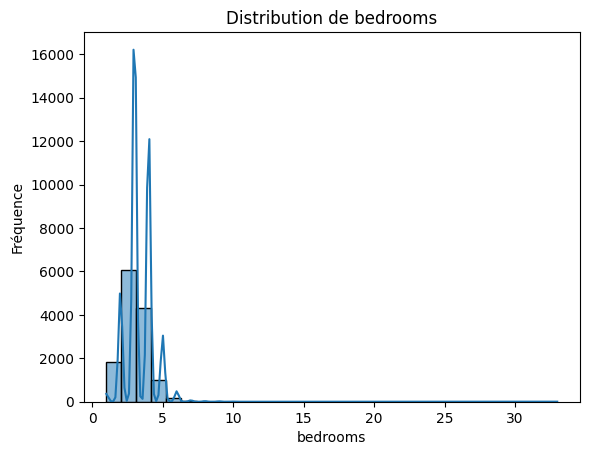

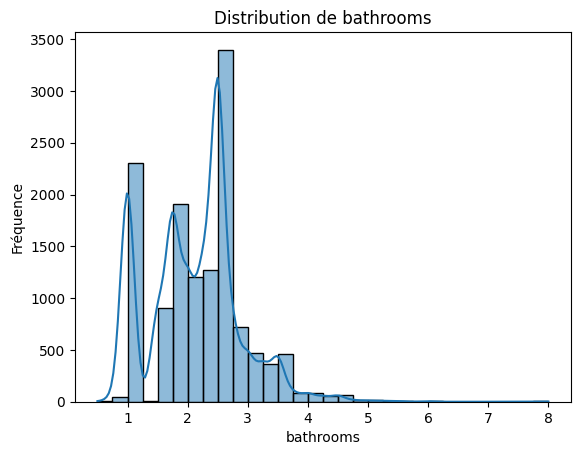

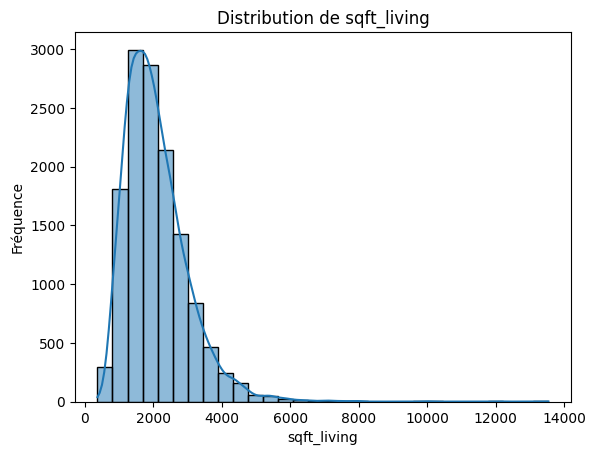

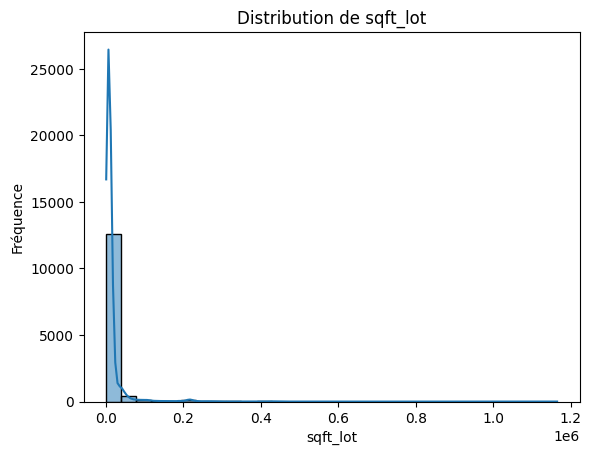

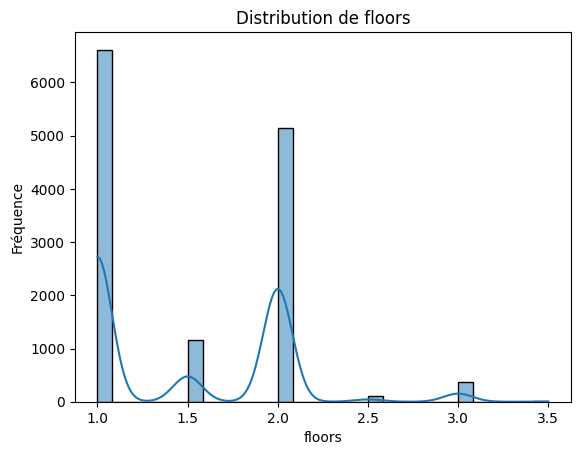

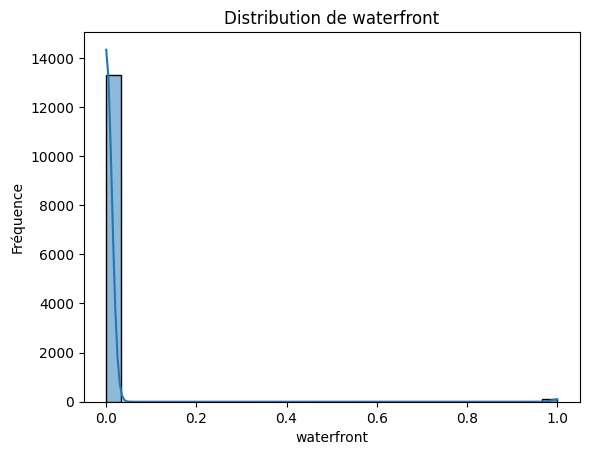

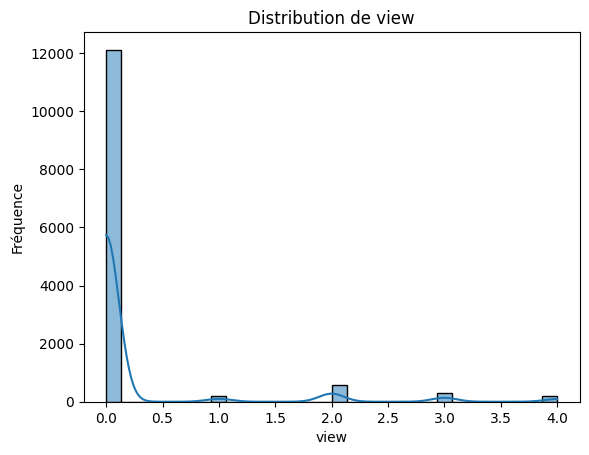

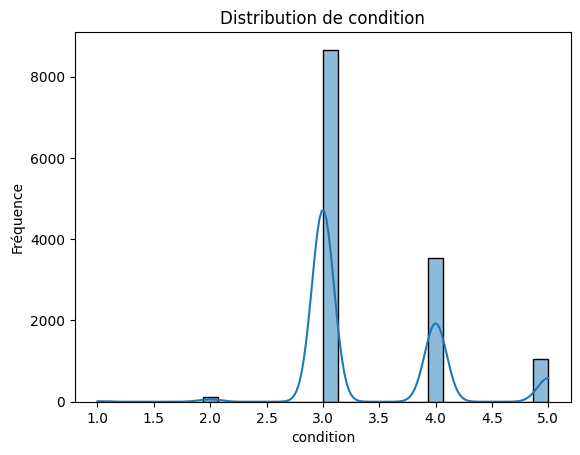

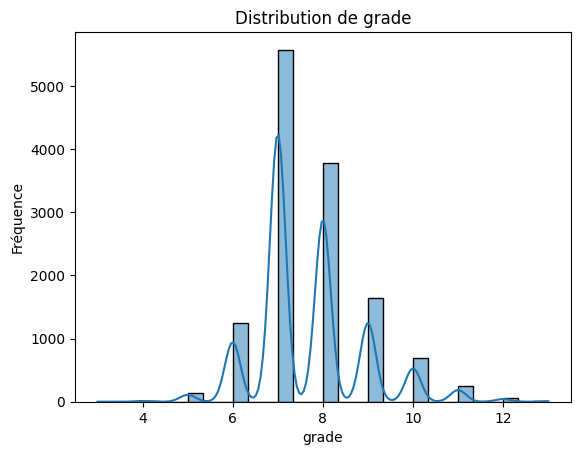

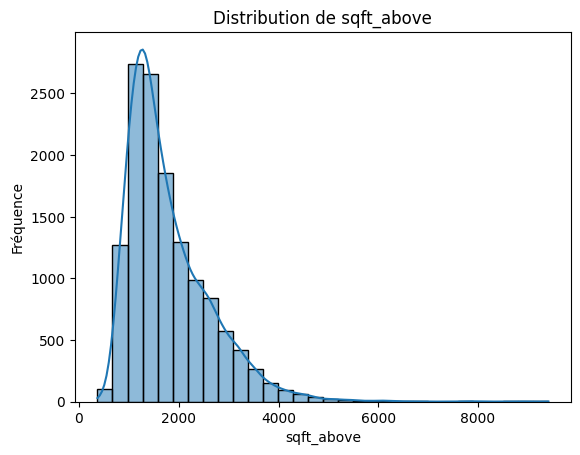

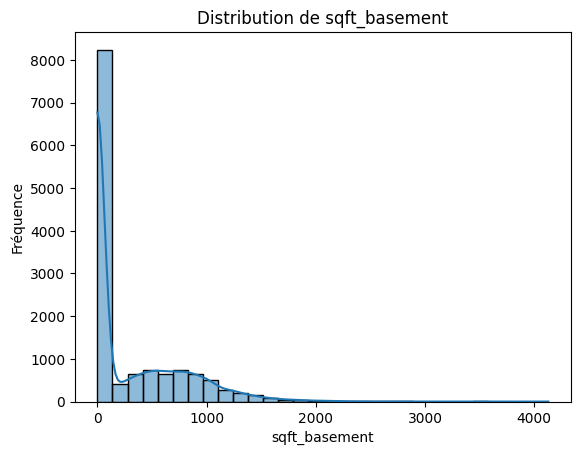

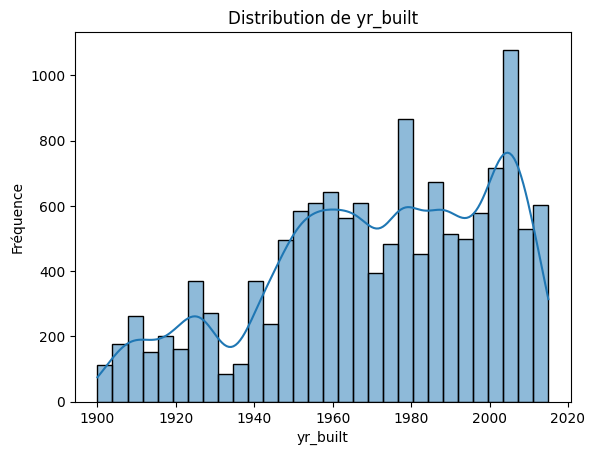

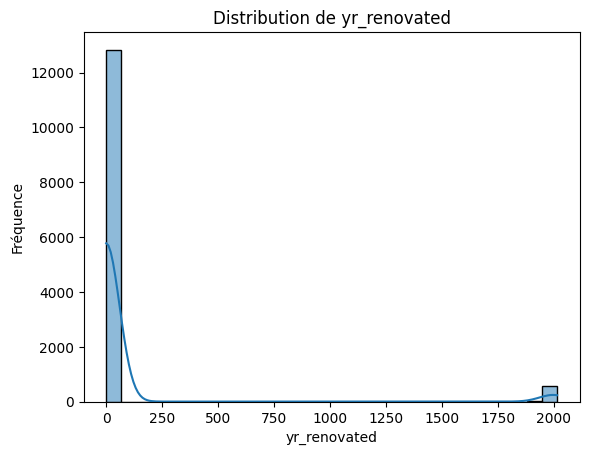

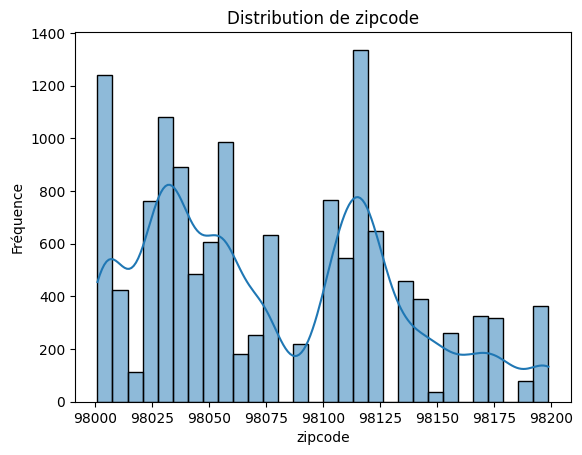

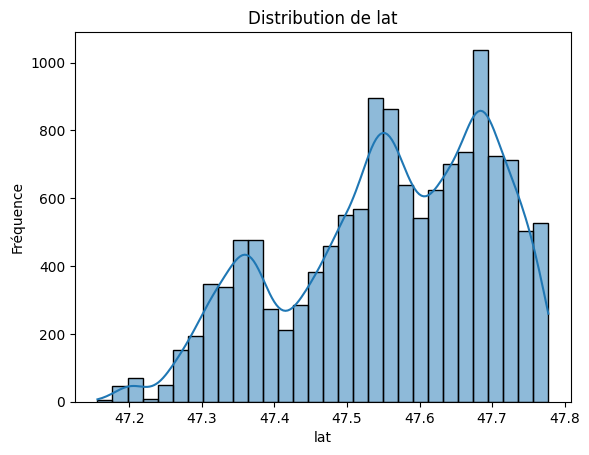

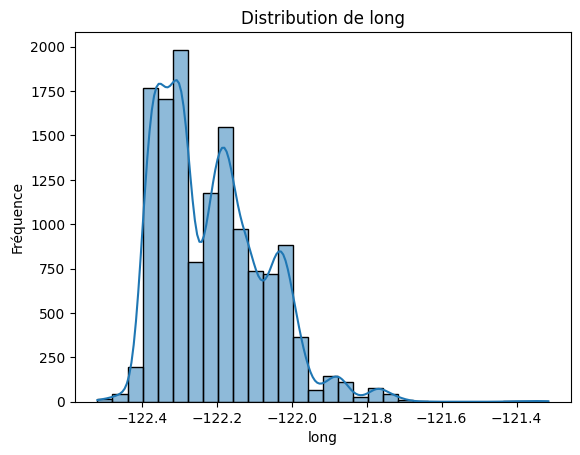

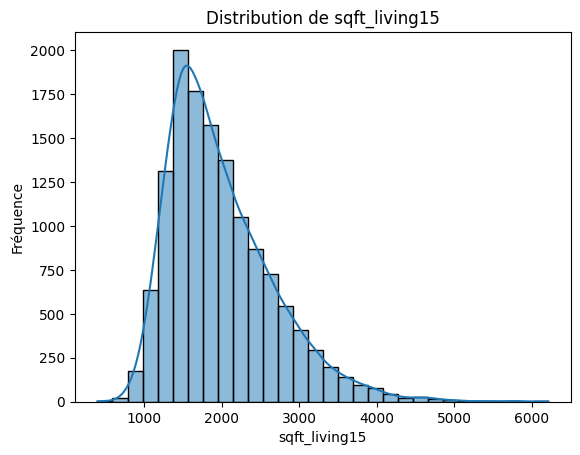

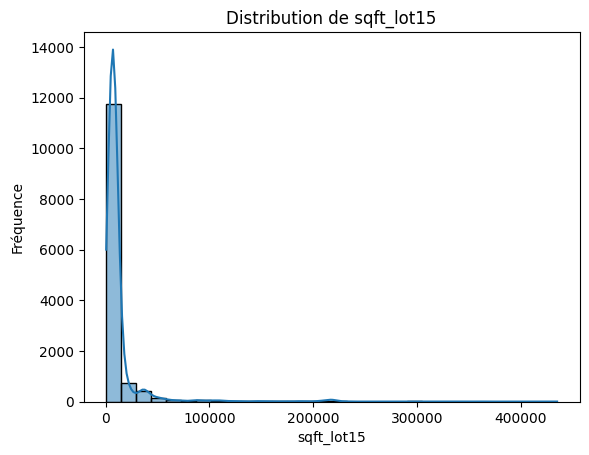

In [3]:
# Distribution de la variable cible (prix de vente)
#sns.histplot(houses['price'], kde=True, bins=30)
#plt.title('Distribution de Price')
#plt.xlabel('Price')
#plt.ylabel('Fréquence')
#plt.show()

# Distribution des variables prédictives (exemple pour une variable prédictive)
for col in houses.columns:
    if col != 'price':
        sns.histplot(houses[col], kde=True, bins=30)
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.show()

2.Visualiser les relations entre les variables prédictives et la cible 

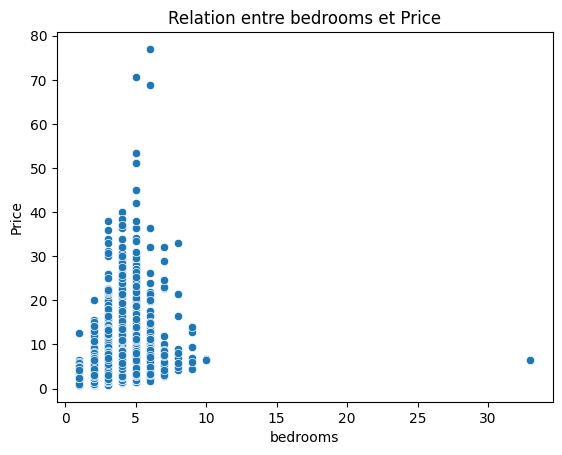

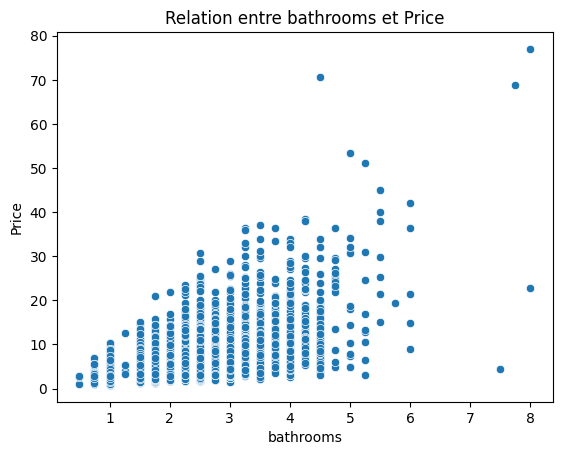

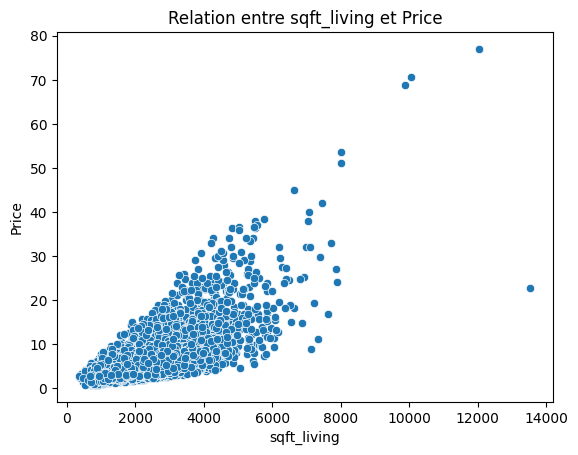

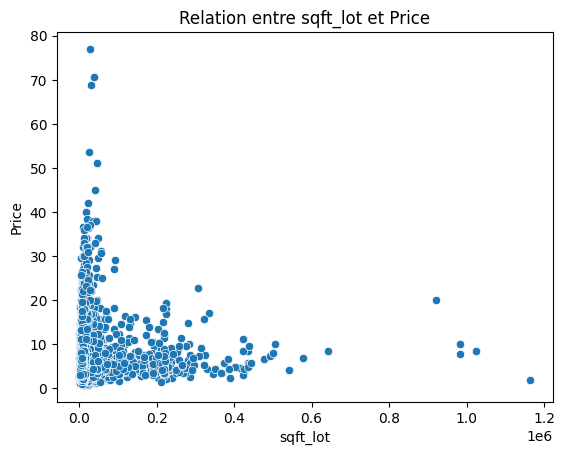

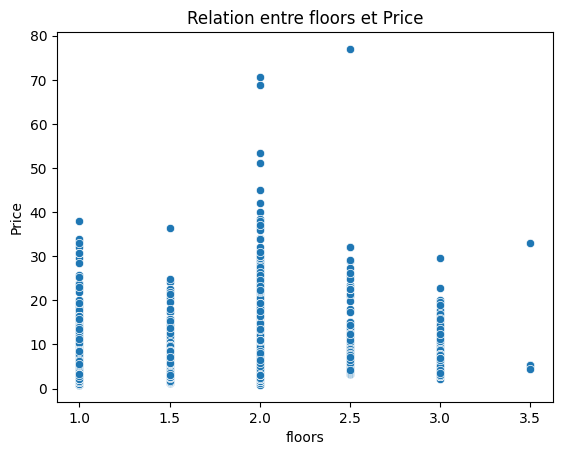

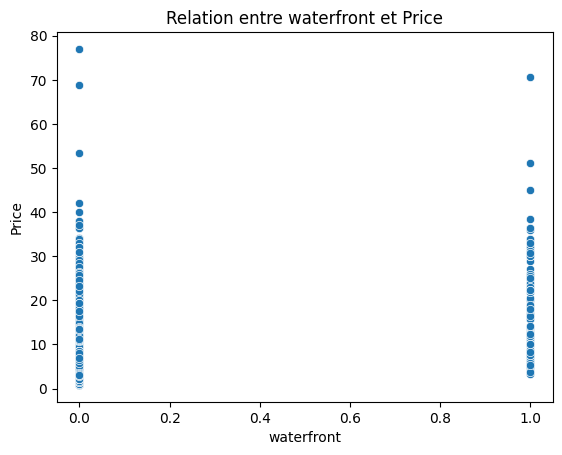

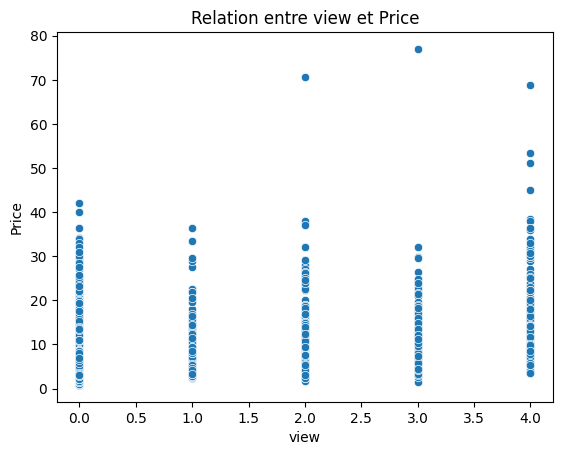

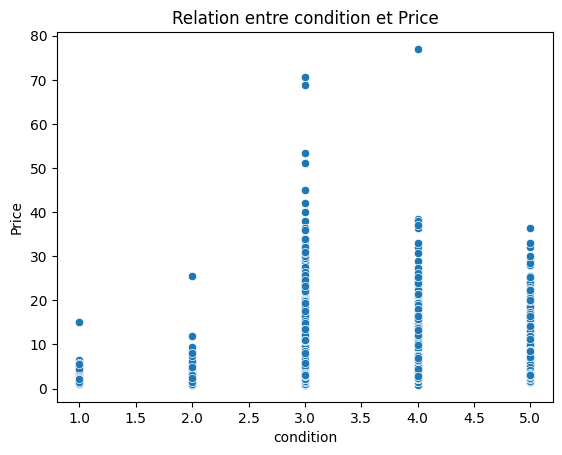

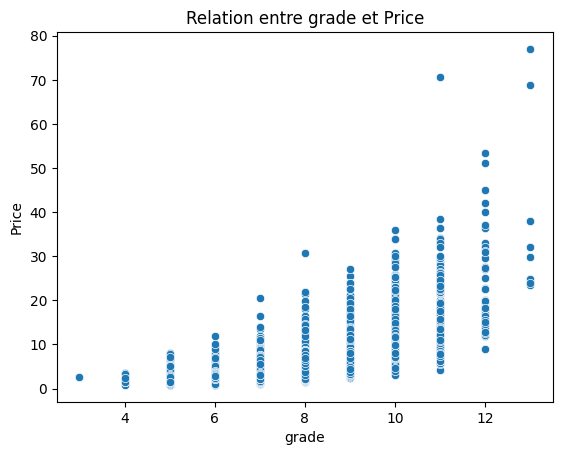

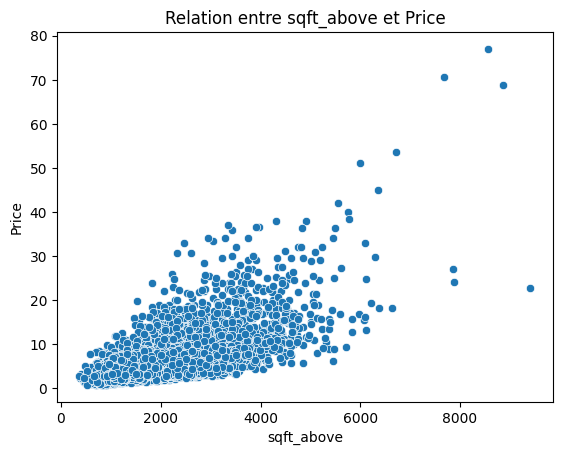

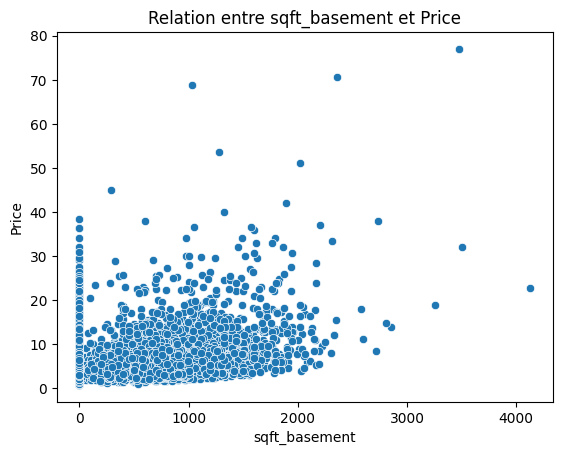

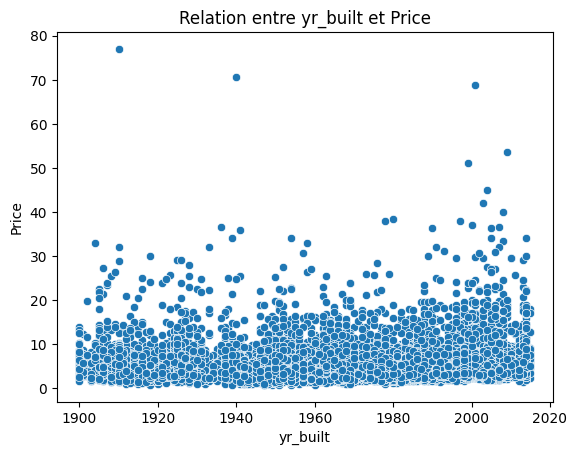

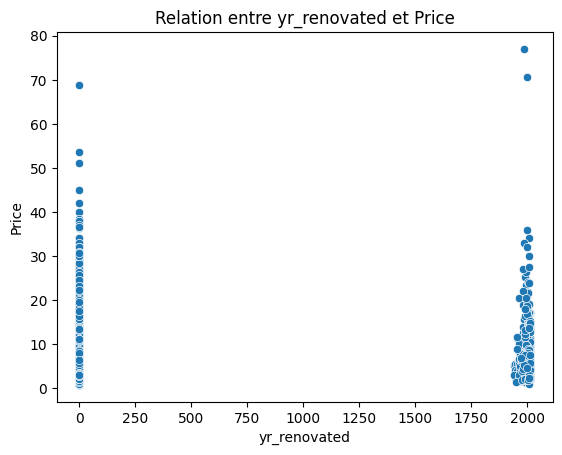

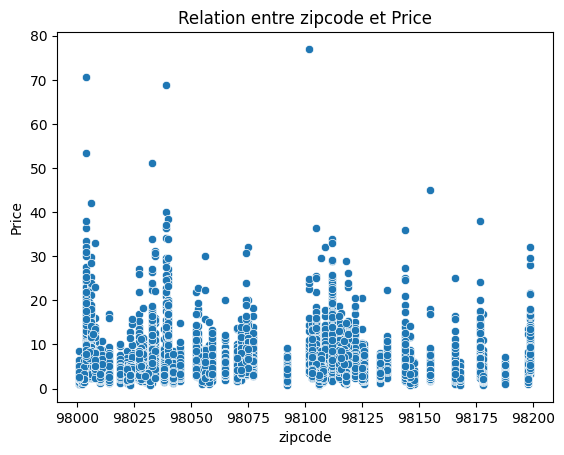

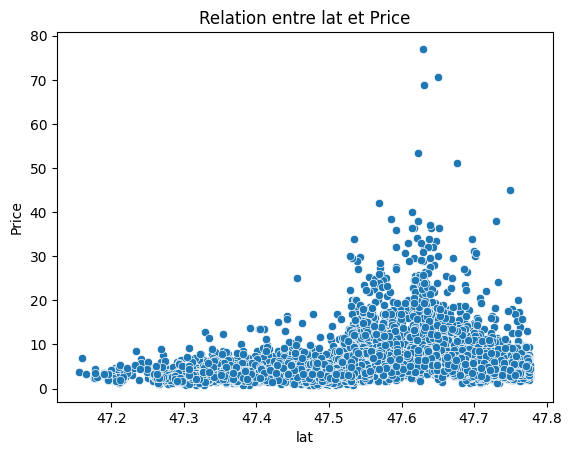

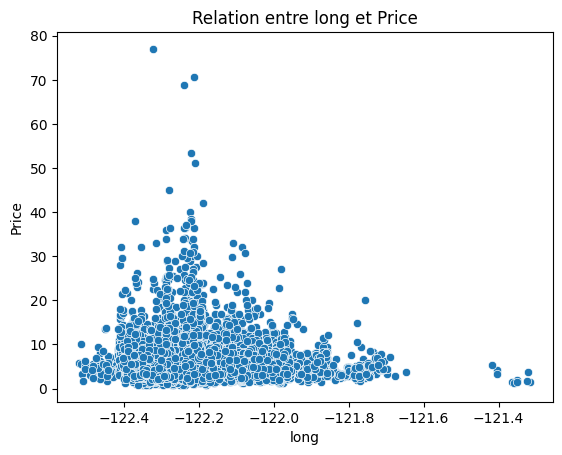

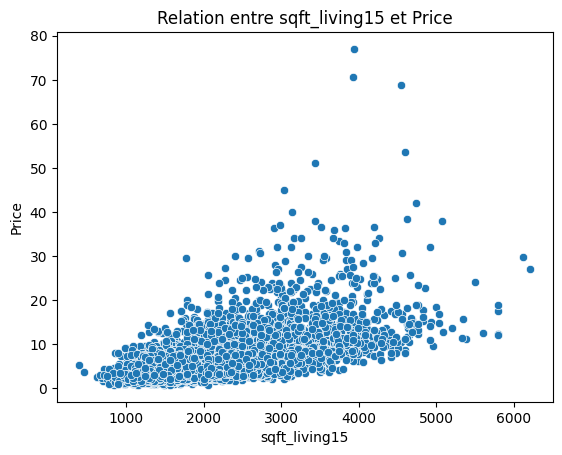

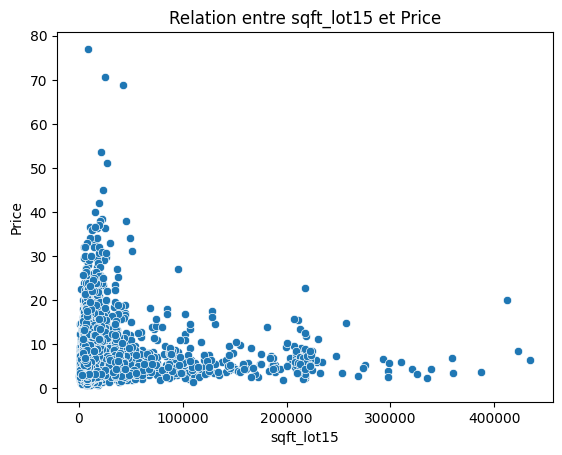

In [4]:
# Relation entre chaque variable prédictive et la cible
for col in houses.columns:
    if col != 'price':
        sns.scatterplot(x=houses[col], y=houses['price'])
        plt.title(f'Relation entre {col} et Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

##  2. Modèles de régression simples 

2. Modèles de régression simples : vous ne pouvez utiliser qu'une seule variable prédictive parmi les 18. Il vous est demandé 
de choisir la meilleure et d'évaluer son erreur de généralisation.

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Définir la variable cible et les variables explicatives
#X = ozone['x1']

target = 'price'
#target_column = houses[target]
predictors = [col for col in houses.columns if col != target]
#target_column

 Choix de la meilleure variable prédictive et l'évaluation de son erreur de généralisation
 Nous allons calculer le R², le I_r et p-value de chaque variable prédictive, ensuite trier les résultats par les critères 
 suivant(R^2 décroissant, I_r croissant, p-value croissant) pour choisir la meileure.

In [6]:
# Initialiser les résultats
results = []

# Boucle sur chaque variable prédictive
for predictor in predictors:
    # Préparer les données pour la régression
    X = sm.add_constant(houses[[predictor]])  # Ajouter une constante pour l'interception
    Y = houses[target]
    
    # Ajuster le modèle
    model = sm.OLS(Y, X).fit()
    
    # Extraire les métriques
    r_squared = model.rsquared
    I_r = np.sum(model.resid ** 2)
    mean_y = np.mean(Y)
    I_t = np.sum((Y - mean_y) ** 2)
    I_m = I_t - I_r
    p_value = model.pvalues[predictor]
    
    # Stocker les résultats
    results.append({
        'predictor': predictor,
        'r_squared': r_squared,
        'I_r': I_r,
        'I_t': I_t,
        'I_m': I_m,
        'p_value': p_value
    })

# Trier les résultats par les critères (R^2 décroissant, I_r croissant, p-value croissant)
results = sorted(results, key=lambda x: (-x['r_squared'], x['I_r'], x['p_value']))

# Afficher les résultats
for res in results:
    print(f"Variable: {res['predictor']}")
    print(f"  R^2: {res['r_squared']:.4f}")
    print(f"  I_r: {res['I_r']:.4f}")
    print(f"  I_t: {res['I_t']:.4f}")
    print(f"  I_m: {res['I_m']:.4f}")
    print(f"  p-value: {res['p_value']:.4e}")
    print()

# Meilleure variable
best_variable = results[0]
print(f"La meilleure variable est {best_variable['predictor']} avec:")
print(f"  R^2: {best_variable['r_squared']:.4f}")
print(f"  I_r: {best_variable['I_r']:.4f}")
print(f"  p-value: {best_variable['p_value']:.4e}")

Variable: sqft_living
  R^2: 0.4964
  I_r: 93751.7801
  I_t: 186163.5652
  I_m: 92411.7852
  p-value: 0.0000e+00

Variable: grade
  R^2: 0.4365
  I_r: 104902.2388
  I_t: 186163.5652
  I_m: 81261.3264
  p-value: 0.0000e+00

Variable: sqft_above
  R^2: 0.3747
  I_r: 116405.0174
  I_t: 186163.5652
  I_m: 69758.5478
  p-value: 0.0000e+00

Variable: sqft_living15
  R^2: 0.3360
  I_r: 123605.7535
  I_t: 186163.5652
  I_m: 62557.8117
  p-value: 0.0000e+00

Variable: bathrooms
  R^2: 0.2769
  I_r: 134614.5473
  I_t: 186163.5652
  I_m: 51549.0180
  p-value: 0.0000e+00

Variable: view
  R^2: 0.1507
  I_r: 158108.9666
  I_t: 186163.5652
  I_m: 28054.5986
  p-value: 0.0000e+00

Variable: sqft_basement
  R^2: 0.0984
  I_r: 167846.6668
  I_t: 186163.5652
  I_m: 18316.8985
  p-value: 1.1884e-303

Variable: lat
  R^2: 0.0953
  I_r: 168419.4115
  I_t: 186163.5652
  I_m: 17744.1537
  p-value: 9.7791e-294

Variable: bedrooms
  R^2: 0.0919
  I_r: 169063.8074
  I_t: 186163.5652
  I_m: 17099.7578
  p-value:

Erreur de généralisation du modèle avec la meilleure variable prédictive

Train/Test Split
Etape:

1.Diviser les données :
    -Divisez les données en deux ensembles : un ensemble d'entraînement (75%) et un  ensemble de test (25%).
    -Utilisez train_test_split de sklearn.

2.Entraîner le modèle :
    -Entraînez un modèle de régression linéaire simple sur l'ensemble d'entraînement en utilisant la meilleure variable prédictive.

3.Prédire sur l'ensemble de test :
    -Utilisez le modèle pour prédire les valeurs de la variable cible sur l'ensemble de test.

4.Calculer l'erreur de généralisation :
    -Calculez l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les prédictions sur l'ensemble de test.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Diviser les données
train, test = train_test_split(houses, test_size=0.25, random_state=42)

# Entraîner le modèle sur la meilleure variable
X_train = sm.add_constant(train[['sqft_living']])  # Remplacez par la meilleure variable
y_train = train['price']
model = sm.OLS(y_train, X_train).fit()

# Prédire sur l'ensemble de test
X_test = sm.add_constant(test[['sqft_living']])
y_test = test['price']
predictions = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse_sqr = mean_squared_error(y_test, predictions)
#print(model.summary())
print(f"Erreur de généralisation (MSE) : {mse_sqr:.4f}")

Erreur de généralisation (MSE) : 7.2663


Validation Croisée (K-Fold Cross-Validation)
Etape:

1.Diviser les données en K sous-ensembles :
    -Divisez les données en K sous-ensembles (par exemple, 5 ou 10).

2.Entraîner et évaluer le modèle :
    -Pour chaque itération, utilisez K-1 sous-ensembles pour entraîner le modèle et le dernier sous-ensemble pour tester.
    
3.Calculer l'erreur moyenne :
    -Calculez la moyenne des erreurs quadratiques moyennes (MSE) sur les K itérations.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Préparer les données
X = houses[['sqft_living']]  # Remplacez par la meilleure variable
y = houses['price']

# Modèle de régression linéaire
model = LinearRegression()


# Validation croisée (5 folds)
mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_simple = mse_scores.mean()

print(f"Erreur de généralisation moyenne (MSE) : {mean_simple:.4f}")

Erreur de généralisation moyenne (MSE) : 7.0169


Créer le fichier CSV submission_regression_simple_cross_validation.csv pour soumission pour la régression simple avec le MSE obtenue avec Validation croisée (K-Fold Cross-Validation)

In [9]:
#Régression simple avec la meilleure variable prédictive
#Dans votre notebook, vous avez identifié sqft_living comme la meilleure variable prédictive. Voici comment générer les prédictions pour le dataset houses_competition.csv :
# submission_regression_simple_cross_validation.csv


# Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)
# Supprimer la colonne 'Unnamed: 0' si elle existe
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')
# Entraîner le modèle sur les données complètes
model.fit(X, y)
# Préparer les données pour le modèle simple
X_competition_simple = competition[['sqft_living']]  # Utiliser la meilleure variable

# Prédire les prix avec le modèle simple
predictions_simple = model.predict(X_competition_simple)

# Créer le fichier CSV pour soumission
submission_simple = pd.DataFrame({'ID': competition.index, 'Price': predictions_simple})
submission_simple.to_csv('submission_regression_simple_cross_validation.csv', index=False)

## 3. Modèle de Régression multiple 

3. Régression multiple : utiliser les 18 variables pour prédire le prix de vente. Estimer l’erreur de généralisation 
de ce modèle.

In [10]:
#1. Charger les données et préparer les variables
#   Assurez-vous que toutes les variables prédictives et la cible sont correctement définies.

# Définir les variables prédictives et la cible
X = houses.drop(columns=['price'])  # Toutes les colonnes sauf 'price'
y = houses['price']  # La variable cible

Train/Test Split

In [11]:
#2. Diviser les données en ensembles d'entraînement et de test
#   Utilisez train_test_split pour diviser les données en deux ensembles.

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement (75%) et de test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
#3. Entraîner le modèle de régression multiple
#   Utilisez un modèle de régression linéaire pour ajuster les données d'entraînement.
from sklearn.linear_model import LinearRegression

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#4. Prédire sur l'ensemble de test
#   Utilisez le modèle pour prédire les valeurs de la cible sur l'ensemble de test.

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [14]:
#5. Calculer l'erreur de généralisation
#   Utilisez l'erreur quadratique moyenne (MSE) pour évaluer l'erreur de généralisation.
from sklearn.metrics import mean_squared_error

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur de généralisation (MSE) : {mse:.4f}")

Erreur de généralisation (MSE) : 4.5553


Créer le fichier CSV submission_multiple.csv pour soumission pour la régression multiple 

In [15]:
#Régression multiple avec les 18 variables prédictives
# submission_multiple.csv

# Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)
# Supprimer la colonne 'Unnamed: 0' si elle existe
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')

# Préparer les données pour le modèle multiple
X_competition_multiple = competition.drop(columns=['price'], errors='ignore')  # Ne pas ajouter de constante

# Prédire les prix avec le modèle multiple
predictions_multiple = model.predict(X_competition_multiple)

# Créer le fichier CSV pour soumission
submission_multiple = pd.DataFrame({'ID': competition.index, 'Price': predictions_multiple})
submission_multiple.to_csv('submission_multiple.csv', index=False)

Validation croisée (K-Fold Cross-Validation)

In [16]:
# On peut aussi faire la validation croisée
#6. Validation croisée (optionnel)
#Pour une estimation plus robuste de l'erreur de généralisation, utilisez la validation croisée.

from sklearn.model_selection import cross_val_score

# Validation croisée (5 folds)
mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_multiple = mse_scores.mean()
print(f"Erreur de généralisation moyenne (MSE) avec validation croisée : {mean_mse_multiple:.4f}")

Erreur de généralisation moyenne (MSE) avec validation croisée : 4.2532


4.  Sélection de variables

Durant le TP nous avons vu le Forward Selection avec le R² ajusté comme critère de performance et 
le critère d'arrêt utiliser est le plus strict arrêt dès que la performance diminue. Nous la mettons en oeuvre ici.

In [17]:
import statsmodels.api as sm
import numpy as np

def forward_selection_adj_r2(data, predictors, target):
    """
    Implémente la méthode de Forward Selection en utilisant le R² ajusté comme critère de performance.
    
    Parameters:
    - data : DataFrame contenant les données.
    - predictors : Liste des noms des variables prédictives.
    - target : Nom de la variable cible.
    
    Returns:
    - selected_predictors : Liste des variables prédictives du meilleur modèle.
    - best_adj_r2 : Meilleur R² ajusté obtenu.
    """
    selected_predictors = []  # Variables sélectionnées
    remaining_predictors = predictors.copy()  # Variables restantes à tester
    best_adj_r2 = -np.inf  # Initialiser avec une valeur très basse
    stop = False  # Critère d'arrêt

    while remaining_predictors and not stop:
        iteration_results = []

        # Testez l'ajout de chaque variable restante
        for predictor in remaining_predictors:
            # Variables sélectionnées + la nouvelle variable
            current_predictors = selected_predictors + [predictor]

            # Préparer les données pour la régression
            X = data[current_predictors]
            X = sm.add_constant(X)  # Ajouter une constante
            y = data[target]

            # Ajuster le modèle
            model = sm.OLS(y, X).fit()

            # Calculer le R² ajusté
            adj_r2 = model.rsquared_adj

            # Stocker les résultats
            iteration_results.append((predictor, adj_r2, model))

        # Trouver la variable qui améliore le plus le R² ajusté
        iteration_results = sorted(iteration_results, key=lambda x: x[1], reverse=True)
        best_candidate, best_candidate_adj_r2, best_model = iteration_results[0]

        # Vérifier si le R² ajusté s'améliore
        if best_candidate_adj_r2 > best_adj_r2:
            best_adj_r2 = best_candidate_adj_r2
            selected_predictors.append(best_candidate)
            remaining_predictors.remove(best_candidate)
            print(f"Variable ajoutée : {best_candidate}")
            print(f"R² ajusté : {best_candidate_adj_r2:.4f}")
        else:
            stop = True  # Arrêter si le R² ajusté diminue

    return selected_predictors, best_adj_r2

In [18]:
#Définir les variables prédictives et la cible
target = 'price'
predictors = [col for col in houses.columns if col != target]

# Appliquer la méthode de Forward Selection
selected_predictors, best_adj_r2 = forward_selection_adj_r2(houses, predictors, target)

# Afficher les résultats
print("\nMeilleur modèle trouvé :")
print(f"Variables sélectionnées : {selected_predictors}")
print(f"R² ajusté : {best_adj_r2:.4f}")

Variable ajoutée : sqft_living
R² ajusté : 0.4964
Variable ajoutée : lat
R² ajusté : 0.5680
Variable ajoutée : waterfront
R² ajusté : 0.6083
Variable ajoutée : grade
R² ajusté : 0.6344
Variable ajoutée : yr_built
R² ajusté : 0.6739
Variable ajoutée : view
R² ajusté : 0.6821
Variable ajoutée : bedrooms
R² ajusté : 0.6855
Variable ajoutée : bathrooms
R² ajusté : 0.6890
Variable ajoutée : zipcode
R² ajusté : 0.6912
Variable ajoutée : long
R² ajusté : 0.6945
Variable ajoutée : sqft_above
R² ajusté : 0.6959
Variable ajoutée : condition
R² ajusté : 0.6972
Variable ajoutée : yr_renovated
R² ajusté : 0.6975
Variable ajoutée : sqft_living15
R² ajusté : 0.6977
Variable ajoutée : sqft_lot15
R² ajusté : 0.6979

Meilleur modèle trouvé :
Variables sélectionnées : ['sqft_living', 'lat', 'waterfront', 'grade', 'yr_built', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'long', 'sqft_above', 'condition', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
R² ajusté : 0.6979


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
# Erreur de généralisation avec les variables sélectionnées


# Étape 1 : Diviser les données
train, test = train_test_split(houses, test_size=0.25, random_state=42)

# Étape 2 : Créer un modèle avec les variables sélectionnées
X_train = train[selected_predictors]  # Utiliser les variables sélectionnées
X_train = sm.add_constant(X_train)  # Ajouter une constante
y_train = train[target]

# Ajuster le modèle
model_selected = sm.OLS(y_train, X_train).fit()

# Étape 3 : Prédire sur l'ensemble de test
X_test = test[selected_predictors]  # Utiliser les mêmes variables sélectionnées
X_test = sm.add_constant(X_test)  # Ajouter une constante
y_test = test[target]

predictions_selected = model_selected.predict(X_test)

# Étape 4 : Calculer l'erreur quadratique moyenne (MSE)
mse_selected_r2 = mean_squared_error(y_test, predictions_selected)
print(f"Erreur quadratique moyenne (MSE)  : {mse_selected_r2:.4f}")

Erreur quadratique moyenne (MSE)  : 4.5548


Nous mettons en oeuvre ici, **le Forward selection** en utilisant l'erreur de généralisation(train/test split) comme critère de performance pour la sélection des variables et comme critère d'arrêt, ne vous arrêtez pas allez jusqu'au bout et gardez le meilleur modèle trouvé.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

def forward_selection_mse(train, test, predictors, target):
    """
    Implémente la méthode de Forward Selection en utilisant l'erreur de généralisation (MSE)
    comme critère de performance.

    Parameters:
    - train : DataFrame contenant les données d'entraînement.
    - test : DataFrame contenant les données de test.
    - predictors : Liste des noms des variables prédictives.
    - target : Nom de la variable cible.

    Returns:
    - best_predictors : Liste des variables prédictives du meilleur modèle.
    - best_mse : Erreur de généralisation (MSE) du meilleur modèle.
    """
    selected_predictors = []  # Variables sélectionnées
    remaining_predictors = predictors.copy()  # Variables restantes à tester
    best_mse = float('inf')  # Initialisez avec une erreur très élevée
    best_predictors = []  # Meilleur ensemble de variables

    while remaining_predictors:
        iteration_results = []

        # Testez l'ajout de chaque variable restante
        for predictor in remaining_predictors:
            # Variables sélectionnées + la nouvelle variable
            current_predictors = selected_predictors + [predictor]

            # Préparer les données pour la régression
            X_train = sm.add_constant(train[current_predictors])  # Ajouter une constante
            y_train = train[target]
            X_test = sm.add_constant(test[current_predictors])  # Ajouter une constante
            y_test = test[target]

            # Ajuster le modèle
            model = sm.OLS(y_train, X_train).fit()

            # Prédire sur l'ensemble de test
            predictions = model.predict(X_test)

            # Calculer l'erreur quadratique moyenne (MSE)
            mse = mean_squared_error(y_test, predictions)

            # Stocker les résultats
            iteration_results.append((predictor, mse, current_predictors))

        # Trouver la variable qui améliore le plus la performance
        iteration_results = sorted(iteration_results, key=lambda x: x[1])  # Trier par MSE croissant
        best_candidate, best_candidate_mse, best_candidate_predictors = iteration_results[0]

        # Mettre à jour le meilleur modèle si nécessaire
        if best_candidate_mse < best_mse:
            best_mse = best_candidate_mse
            best_predictors = best_candidate_predictors
            selected_predictors.append(best_candidate)
            remaining_predictors.remove(best_candidate)

            # Afficher les informations de l'itération
            print(f"Variable ajoutée : {best_candidate}")
            print(f"Erreur de généralisation (MSE) : {best_candidate_mse:.4f}")
            print(f"Variables sélectionnées : {best_predictors}")
            print("-" * 50)
        else:
            # Arrêter si aucune amélioration n'est obtenue
            break

    return best_predictors, best_mse

In [21]:
# Diviser les données en ensembles d'entraînement et de test
train, test = train_test_split(houses, test_size=0.25, random_state=42)

# Définir les variables prédictives et la cible
target = 'price'
predictors = [col for col in houses.columns if col != target]

# Appliquer la méthode de Forward Selection
best_predictors, best_mse = forward_selection_mse(train, test, predictors, target)

# Afficher les résultats
print("\nMeilleur modèle trouvé :")
print(f"Variables sélectionnées : {best_predictors}")
print(f"Erreur de généralisation (MSE) : {best_mse:.4f}")

Variable ajoutée : sqft_living
Erreur de généralisation (MSE) : 7.2663
Variables sélectionnées : ['sqft_living']
--------------------------------------------------
Variable ajoutée : lat
Erreur de généralisation (MSE) : 6.2608
Variables sélectionnées : ['sqft_living', 'lat']
--------------------------------------------------
Variable ajoutée : view
Erreur de généralisation (MSE) : 5.7040
Variables sélectionnées : ['sqft_living', 'lat', 'view']
--------------------------------------------------
Variable ajoutée : grade
Erreur de généralisation (MSE) : 5.4836
Variables sélectionnées : ['sqft_living', 'lat', 'view', 'grade']
--------------------------------------------------
Variable ajoutée : yr_built
Erreur de généralisation (MSE) : 5.0362
Variables sélectionnées : ['sqft_living', 'lat', 'view', 'grade', 'yr_built']
--------------------------------------------------
Variable ajoutée : waterfront
Erreur de généralisation (MSE) : 4.8190
Variables sélectionnées : ['sqft_living', 'lat', 'vi

In [22]:
# Résultats des erreurs de généralisation (MSE) pour chaque modèle
results_comparison = {
    "Single Variable (Best)": mean_simple,  # MSE pour la meilleure variable
    "All Variables": mean_mse_multiple,  # MSE pour toutes les variables
    "Forward Selection (MSE)": best_mse,  # MSE pour le modèle Forward Selection
}

# Afficher les résultats triés par MSE croissant
sorted_results = sorted(results_comparison.items(), key=lambda x: x[1])
print("\nComparaison des erreurs de généralisation (MSE) :")
for model, mse in sorted_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mse = sorted_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur de généralisation (MSE) de {best_mse:.4f}.")


Comparaison des erreurs de généralisation (MSE) :
All Variables: 4.2532
Forward Selection (MSE): 4.5449
Single Variable (Best): 7.0169

Le meilleur modèle est 'All Variables' avec une erreur de généralisation (MSE) de 4.2532.


Du coup ici nous avons choisir d'utiliser le Forward Selection en utilisant la probabilité critique comme critère de performance 
pour la sélection des variables (pour ce critère de performance, un seul critère d'arrêt particulier peut être utilisé : arrêter lorsque toutes les variables 
sélectionnées sont significatives et qu'aucune des autres variables n'est significative une fois ajoutée). Significatif 
signifie une probabilité critique inférieure à 0..05.

In [23]:
import numpy as np
import statsmodels.api as sm

def step_selection_pval(train, v_s, v_nu, idx_t):
    """
    Une étape de la sélection en avant basée sur la probabilité critique (p-valeur).
    
    Parameters:
    - train : DataFrame contenant les données d'entraînement.
    - v_s : Liste des indices des variables déjà sélectionnées.
    - v_nu : Liste des indices des variables non encore utilisées.
    - idx_t : Index de la variable cible dans le DataFrame.
    
    Returns:
    - best_variable : La meilleure variable à ajouter (ou None si aucune n'est significative).
    - best_pval : La p-valeur associée à la meilleure variable.
    """
    best_pval = 1.0  # Initialiser avec une p-valeur élevée
    best_variable = None

    for var in v_nu:
        # Combiner les variables sélectionnées avec la variable actuelle
        current_vars = np.append(v_s, var)
        
        # Préparer les données pour la régression
        X = train.iloc[:, current_vars]
        y = train.iloc[:, idx_t]
        X = sm.add_constant(X)  # Ajouter une constante pour l'interception
        
        # Ajuster le modèle
        model = sm.OLS(y, X).fit()

        # Récupérer la p-valeur de la variable actuelle
        column_name = train.columns[var]  # Obtenir le nom de la colonne correspondant à l'index
        pval = model.pvalues[column_name] # Utiliser le nom de la colonne pour accéder à la p-valeur
        
        # Vérifier si cette variable est la meilleure (p-valeur la plus basse)
        if pval < best_pval and pval < 0.05:  # Seulement si elle est significative
            best_pval = pval
            best_variable = var

    return best_variable, best_pval


def forward_selection_pval(train, idx_p, idx_t):
    """
    Sélection en avant basée sur la probabilité critique (p-valeur).
    
    Parameters:
    - train : DataFrame contenant les données d'entraînement.
    - idx_p : Liste des indices des variables prédictives.
    - idx_t : Index de la variable cible dans le DataFrame.
    
    Returns:
    - selected_vars : Liste des indices des variables sélectionnées.
    """
    selected_vars = []  # Variables sélectionnées
    non_selected_vars = idx_p.copy()  # Variables disponibles pour la sélection
    stop = False  # Critère d'arrêt

    while non_selected_vars and not stop:
        # Effectuer une étape de sélection
        best_var, best_pval = step_selection_pval(train, selected_vars, non_selected_vars, idx_t)
        
        if best_var is not None:  # Si une variable significative a été trouvée
            selected_vars.append(best_var)
            non_selected_vars.remove(best_var)
        else:
            stop = True  # Arrêter si aucune variable significative n'est trouvée

        # Vérifier si toutes les variables sélectionnées sont significatives
        if selected_vars:
            X = train.iloc[:, selected_vars]
            y = train.iloc[:, idx_t]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit()
            
            # Si une variable sélectionnée n'est plus significative, arrêter
            if not all(model.pvalues[1:] < 0.05):  # Ignorer la constante (indice 0)
                stop = True

    return selected_vars

Appliquons cette fonction forward_selection_pval pour sélectionner le meilleur sous-ensemble de variables pour le critère la probabilité critique.
Quelle est l'estimation de l'erreur de généralisation du modèle utilisant ce sous-ensemble de variables ?
Est-il meilleur que celui utilisant toutes les variables ?

In [24]:
#Étape 1 : Appliquer forward_selection_pval
# Nous allons utiliser la fonction forward_selection_pval pour sélectionner les variables significatives.

idx_t = houses.columns.get_loc('price')  # Index de la variable cible
# Indices des variables prédictives
idx_p = [i for i in range(houses.shape[1]) if i != idx_t]  # Toutes les colonnes sauf la cible
# print(idx_p)

# print(idx_t)
# Diviser les données en train et test
train, test = train_test_split(houses, test_size=0.25, random_state=42)

# Appliquer la sélection en avant basée sur la probabilité critique
selected_vars = forward_selection_pval(train, idx_p, idx_t)

# Afficher les variables sélectionnées
print(f"Variables sélectionnées : {houses.columns[selected_vars].tolist()}")
assert 'price' not in houses.columns[selected_vars], "La variable cible 'price' ne doit pas être dans les variables sélectionnées."

Variables sélectionnées : ['bathrooms', 'sqft_living']


In [25]:
#Étape 2 : Créer un modèle avec les variables sélectionnées
# Nous allons entraîner un modèle de régression linéaire en utilisant uniquement les variables sélectionnées.

# Créer un modèle avec les variables sélectionnées
X_train = train.iloc[:, selected_vars]
X_train = sm.add_constant(X_train)  # Ajouter une constante
y_train = train['price']

# Ajuster le modèle
model_selected = sm.OLS(y_train, X_train).fit()

# Afficher un résumé du modèle
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     4918.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:49:17   Log-Likelihood:                -23964.
No. Observations:               10047   AIC:                         4.793e+04
Df Residuals:                   10044   BIC:                         4.796e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4407      0.078     -5.664      

In [26]:
#Étape 3 : Estimer l'erreur de généralisation
# Nous allons estimer l'erreur de généralisation en utilisant le train/test split.

# Préparer les données de test
X_test = test.iloc[:, selected_vars]
X_test = sm.add_constant(X_test)  # Ajouter une constante
y_test = test['price']

# Prédire sur l'ensemble de test
predictions_selected = model_selected.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse_selected = mean_squared_error(y_test, predictions_selected)
print(f"Erreur de généralisation (MSE)  : {mse_selected:.4f}")

Erreur de généralisation (MSE)  : 7.2705


Nous mettons en oeuvre , **le Forward Selection en utilisant l'erreur de généralisation(Cross-validation)** comme critère de performance pour la sélection des variables et et comme critère d'arrêt, ne vous arrêtez pas allez jusqu'au bout et gardez le meilleur modèle trouvé.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

def forward_selection_cv(data, predictors, target, cv=10):
    """
    Implémente la méthode de Forward Selection en utilisant l'erreur de généralisation (MSE)
    basée sur la validation croisée comme critère de performance.

    Parameters:
    - data : DataFrame contenant les données.
    - predictors : Liste des noms des variables prédictives.
    - target : Nom de la variable cible.
    - cv : Nombre de folds pour la validation croisée.

    Returns:
    - best_predictors : Liste des variables prédictives du meilleur modèle.
    - best_mse : Erreur de généralisation (MSE) du meilleur modèle.
    """
    selected_predictors = []  # Variables sélectionnées
    remaining_predictors = predictors.copy()  # Variables restantes à tester
    best_mse_fcv = float('inf')  # Initialisez avec une erreur très élevée
    best_predictors = []  # Meilleur ensemble de variables

    while remaining_predictors:
        iteration_results = []

        # Testez l'ajout de chaque variable restante
        for predictor in remaining_predictors:
            # Variables sélectionnées + la nouvelle variable
            current_predictors = selected_predictors + [predictor]

            # Préparer les données pour la validation croisée
            X = data[current_predictors]
            y = data[target]

            # Modèle de régression linéaire
            model = LinearRegression()

            # Validation croisée pour calculer le MSE
            mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
            mean_mse_fcv = mse_scores.mean()

            # Stocker les résultats
            iteration_results.append((predictor, mean_mse_fcv))

        # Trouver la variable qui améliore le plus la performance
        iteration_results = sorted(iteration_results, key=lambda x: x[1])  # Trier par MSE croissant
        best_candidate, best_candidate_mse = iteration_results[0]

        # Mettre à jour le meilleur modèle si nécessaire
        if best_candidate_mse < best_mse_fcv:
            best_mse_fcv = best_candidate_mse
            best_predictors = selected_predictors + [best_candidate]

        # Ajouter la meilleure variable au modèle
        selected_predictors.append(best_candidate)
        remaining_predictors.remove(best_candidate)

        # Afficher les informations de l'itération
        print(f"Variable ajoutée : {best_candidate}")
        print(f"Erreur de généralisation (MSE) : {best_candidate_mse:.4f}")
        print(f"Variables sélectionnées : {selected_predictors}")
        print("-" * 50)

    return best_predictors, best_mse_fcv


# Appliquer la méthode de Forward Selection
target = 'price'  # Nom de la variable cible
predictors = [col for col in houses.columns if col != target]  # Liste des variables prédictives

best_predictors, best_mse_fcv = forward_selection_cv(houses, predictors, target, cv=10)

# Afficher les résultats
print("\nMeilleur modèle trouvé :")
print(f"Variables sélectionnées : {best_predictors}")
print(f"Erreur de généralisation (MSE) : {best_mse_fcv:.4f}")

Variable ajoutée : sqft_living
Erreur de généralisation (MSE) : 7.0106
Variables sélectionnées : ['sqft_living']
--------------------------------------------------
Variable ajoutée : lat
Erreur de généralisation (MSE) : 6.0143
Variables sélectionnées : ['sqft_living', 'lat']
--------------------------------------------------
Variable ajoutée : waterfront
Erreur de généralisation (MSE) : 5.4626
Variables sélectionnées : ['sqft_living', 'lat', 'waterfront']
--------------------------------------------------
Variable ajoutée : grade
Erreur de généralisation (MSE) : 5.1038
Variables sélectionnées : ['sqft_living', 'lat', 'waterfront', 'grade']
--------------------------------------------------
Variable ajoutée : yr_built
Erreur de généralisation (MSE) : 4.5543
Variables sélectionnées : ['sqft_living', 'lat', 'waterfront', 'grade', 'yr_built']
--------------------------------------------------
Variable ajoutée : view
Erreur de généralisation (MSE) : 4.4427
Variables sélectionnées : ['sqft_l

Créer le fichier CSV submission_forward_selection_cv.csv pour soumission pour le modele utilisant le Forward Selection en utilisant l'erreur de généralisation(Cross-validation) comme critère de performance pour la sélection des variables et comme critère d'arrêt, ne vous arrêtez pas allez jusqu'au bout et gardez le meilleur modèle trouvé.  

In [28]:
# Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)
# Supprimer la colonne 'Unnamed: 0' si elle existe
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')

# Variables sélectionnées par forward_selection_cv
# Assurez-vous que `best_predictors` contient les variables sélectionnées par forward_selection_cv
# Exemple : best_predictors = ['sqft_living', 'bathrooms', 'bedrooms']
print(f"Variables sélectionnées par forward_selection_cv : {best_predictors}")

# Réentraîner le modèle avec toutes les données d'entraînement
X_train_final = houses[best_predictors]
y_train_final = houses['price']
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)
# Préparer les données pour le modèle avec les variables sélectionnées
X_competition_forward = competition[best_predictors]  # Utiliser uniquement les variables sélectionnées

# Prédire les prix avec le modèle obtenu via forward_selection_cv
predictions_forward = final_model.predict(X_competition_forward)

# Créer le fichier CSV pour soumission
submission_forward = pd.DataFrame({'ID': competition.index, 'Price': predictions_forward})
submission_forward.to_csv('submission_forward_selection_cv.csv', index=False)

print("Fichier de soumission créé : submission_forward_selection_cv.csv")

Variables sélectionnées par forward_selection_cv : ['sqft_living', 'lat', 'waterfront', 'grade', 'yr_built', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'long', 'sqft_above', 'condition', 'sqft_lot15', 'yr_renovated']
Fichier de soumission créé : submission_forward_selection_cv.csv


Nous mettons en oeuvre ici, **le backward selection** en utilisant l'erreur de généralisation(train/test split) comme critère de performance pour la sélection des variables et comme critère d'arrêt, ne vous arrêtez pas allez jusqu'au bout et gardez le meilleur modèle trouvé.

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def backward_selection(train, test, idx_p, idx_t):
    """
    Implémente la méthode de backward selection en utilisant l'erreur de généralisation (MSE).
    
    Parameters:
    - train : DataFrame contenant les données d'entraînement.
    - test : DataFrame contenant les données de test.
    - idx_p : Liste des indices des variables prédictives.
    - idx_t : Index de la variable cible.
    
    Returns:
    - best_model : Le meilleur modèle trouvé.
    - best_vars : Liste des indices des variables prédictives du meilleur modèle.
    - best_mse : Erreur de généralisation (MSE) du meilleur modèle.
    """
    current_vars = idx_p.copy()  # Commencez avec toutes les variables prédictives
    best_model = None
    best_mse = float('inf')  # Initialisez avec une erreur très élevée
    best_vars = current_vars.copy()
    
    while current_vars:
        # Initialiser les résultats pour cette itération
        iteration_results = []
        
        for var in current_vars:
            # Créez un sous-ensemble des variables prédictives sans la variable actuelle
            vars_subset = [v for v in current_vars if v != var]
            
            # Préparer les données pour la régression
            X_train = train.iloc[:, vars_subset]
            X_train = sm.add_constant(X_train)  # Ajouter une constante
            y_train = train.iloc[:, idx_t]
            
            X_test = test.iloc[:, vars_subset]
            X_test = sm.add_constant(X_test)  # Ajouter une constante
            y_test = test.iloc[:, idx_t]
            
            # Ajuster le modèle
            model = sm.OLS(y_train, X_train).fit()
            
            # Prédire sur l'ensemble de test
            predictions = model.predict(X_test)
            
            # Calculer l'erreur quadratique moyenne (MSE)
            mse = mean_squared_error(y_test, predictions)
            
            # Stocker les résultats
            iteration_results.append((var, mse, model, vars_subset))
        
        # Trouver la variable à supprimer (celle qui augmente le moins l'erreur)
        iteration_results = sorted(iteration_results, key=lambda x: x[1])  # Trier par MSE croissant
        worst_var, worst_mse, worst_model, worst_vars_subset = iteration_results[0]
        
        # Mettre à jour le meilleur modèle si nécessaire
        if worst_mse < best_mse:
            best_mse = worst_mse
            best_model = worst_model
            best_vars = worst_vars_subset
        
        # Supprimer la variable avec le plus faible impact
        current_vars.remove(worst_var)
        
        # print(f"Variable supprimée : {train.columns[worst_var]}")
        # print(f"Erreur de généralisation (MSE) : {worst_mse:.4f}")
        # print(f"Variables restantes : {[train.columns[v] for v in current_vars]}")
        # print("-" * 50)
    
    return best_model, best_vars, best_mse



# Définir les indices des variables prédictives et de la cible
target = 'price'
idx_t = houses.columns.get_loc(target)
idx_p = [i for i in range(houses.shape[1]) if i != idx_t]

# Diviser les données en ensembles d'entraînement et de test
train, test = train_test_split(houses, test_size=0.25, random_state=42)

# Appliquer la méthode de backward selection
best_model, best_vars, best_mse = backward_selection(train, test, idx_p, idx_t)

# Afficher les résultats
print("\nMeilleur modèle trouvé :")
print(f"Variables sélectionnées : {[houses.columns[v] for v in best_vars]}")
print(f"Erreur de généralisation (MSE) : {best_mse:.4f}")
print(best_model.summary())


Meilleur modèle trouvé :
Variables sélectionnées : ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15']
Erreur de généralisation (MSE) : 4.5449
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1570.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:49:28   Log-Likelihood:                -21324.
No. Observations:               10047   AIC:                         4.268e+04
Df Residuals:                   10031   BIC:                         4.280e+04
Df Model:                          15                                         
Covariance Type:  

Créer le fichier CSV submission_backward_selection.csv pour soumission pour le modele utilisant le backward selection en utilisant l'erreur de généralisation(train/test split) comme critère de performance pour la sélection des variables et comme critère d'arrêt, ne vous arrêtez pas allez jusqu'au bout et gardez le meilleur modèle trouvé.


In [30]:
# Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)
# Supprimer la colonne 'Unnamed: 0' si elle existe
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')

# Étape 1 : Préparer les données pour le modèle backward_selection
# Utiliser les variables sélectionnées par backward_selection
selected_columns = [houses.columns[v] for v in best_vars]  # Variables sélectionnées par backward_selection
X_competition_backward = competition[selected_columns]  # Sélectionner uniquement les colonnes nécessaires
X_competition_backward = sm.add_constant(X_competition_backward)  # Ajouter une constante

# Étape 2 : Prédire les prix avec le modèle backward_selection
predictions_backward = best_model.predict(X_competition_backward)

# Étape 3 : Créer le fichier CSV pour soumission
submission_backward = pd.DataFrame({'ID': competition.index, 'Price': predictions_backward})
submission_backward.to_csv('submission_backward_selection.csv', index=False)

print("Fichier de soumission créé : submission_backward_selection.csv")

Fichier de soumission créé : submission_backward_selection.csv


Nous mettons en oeuvre , le backward selection en utilisant l'erreur de généralisation(Cross-validation) comme critère de performance pour la sélection des variables et comme critère d'arrêt, arrêtez-vous lorsqu'aucun meilleur modèle n'a été trouvé depuis δ = 5 itérations

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def backward_selection_cv(data, predictors, target, delta=5, cv=10):
    """
    Implémente la méthode de backward selection en utilisant l'erreur de généralisation (MSE)
    basée sur la validation croisée comme critère de performance.

    Parameters:
    - data : DataFrame contenant les données.
    - predictors : Liste des noms des variables prédictives.
    - target : Nom de la variable cible.
    - delta : Nombre maximal d'itérations sans amélioration avant d'arrêter.
    - cv : Nombre de folds pour la validation croisée.

    Returns:
    - best_model : Le meilleur modèle trouvé.
    - best_predictors : Liste des variables prédictives du meilleur modèle.
    - best_mse : Erreur de généralisation (MSE) du meilleur modèle.
    """
    current_predictors = predictors.copy()  # Commencez avec toutes les variables prédictives
    best_mse_cv = float('inf')  # Initialisez avec une erreur très élevée
    best_predictors = current_predictors.copy()
    no_improvement_count = 0  # Compteur pour les itérations sans amélioration

    while current_predictors and no_improvement_count < delta:
        iteration_results = []

        # Testez la suppression de chaque variable
        for predictor in current_predictors:
            # Variables restantes après suppression
            predictors_subset = [p for p in current_predictors if p != predictor]

            # Préparer les données pour la validation croisée
            X = data[predictors_subset]
            y = data[target]

            # Modèle de régression linéaire
            model = LinearRegression()

            # Validation croisée pour calculer le MSE
            mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
            mean_mse_cv = mse_scores.mean()

            # Stocker les résultats
            iteration_results.append((predictor, mean_mse_cv, predictors_subset))

        # Trouver la variable dont la suppression donne le meilleur MSE
        iteration_results = sorted(iteration_results, key=lambda x: x[1])  # Trier par MSE croissant
        worst_predictor, worst_mse_cv, worst_predictors_subset = iteration_results[0]

        # Vérifiez si le nouveau modèle est meilleur
        if worst_mse_cv < best_mse_cv:
            best_mse_cv = worst_mse_cv
            best_predictors = worst_predictors_subset
            no_improvement_count = 0  # Réinitialiser le compteur
        else:
            no_improvement_count += 1  # Incrémenter le compteur

        # Supprimer la variable avec le plus faible impact
        current_predictors.remove(worst_predictor)

        # Afficher les informations de l'itération
        print(f"Variable supprimée : {worst_predictor}")
        print(f"Erreur de généralisation (MSE) : {worst_mse_cv:.4f}")
        print(f"Variables restantes : {current_predictors}")
        print("-" * 50)

    return best_predictors, best_mse_cv

In [32]:
# Appliquer la méthode de backward selection
best_predictors, best_mse_cv = backward_selection_cv(houses, predictors, target, delta=5, cv=10)

# Afficher les résultats
print("\nMeilleur modèle trouvé :")
print(f"Variables sélectionnées : {best_predictors}")
print(f"Erreur de généralisation (MSE) : {best_mse_cv:.4f}")

Variable supprimée : sqft_living15
Erreur de généralisation (MSE) : 4.2385
Variables restantes : ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15']
--------------------------------------------------
Variable supprimée : floors
Erreur de généralisation (MSE) : 4.2371
Variables restantes : ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15']
--------------------------------------------------
Variable supprimée : sqft_basement
Erreur de généralisation (MSE) : 4.2365
Variables restantes : ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15']
---------------------------------

Créer le fichier CSV submission_backward_selection_cv.csv pour soumission pour le modele utilisant le backward selection en utilisant l'erreur de généralisation(Cross-validation) comme critère de performance pour la sélection des variables et comme critère d'arrêt, arrêtez-vous lorsqu'aucun meilleur modèle n'a été trouvé depuis δ = 5 itérations

 

In [33]:

# Étape 2 : Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')  # Supprimer la colonne inutile si elle existe

# Étape 3 : Préparer les données pour le modèle backward_selection_cv
X_train = houses[best_predictors]  # Variables sélectionnées
y_train = houses[target]

# Ajuster le modèle final avec les variables sélectionnées
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# Préparer les données de compétition
X_competition = competition[best_predictors]

# Vérifier les colonnes manquantes entre le modèle et les données de compétition
missing_columns = set(best_predictors) - set(X_competition.columns)
for col in missing_columns:
    X_competition[col] = 0  # Ajouter les colonnes manquantes avec des valeurs par défaut (0)

# Réordonner les colonnes pour correspondre à l'ordre attendu par le modèle
X_competition = X_competition[best_predictors]

# Étape 4 : Prédire les prix avec le modèle backward_selection_cv
predictions_competition = final_model.predict(X_competition)

# Étape 5 : Créer le fichier CSV pour soumission
submission = pd.DataFrame({'ID': competition.index, 'Price': predictions_competition})
submission.to_csv('submission_backward_selection_cv.csv', index=False)

print("Fichier de soumission créé : submission_backward_selection_cv.csv")

Fichier de soumission créé : submission_backward_selection_cv.csv


Comparer les modèles
Étapes pour la comparaison :
Récupérer les erreurs de généralisation (MSE) :

Extraire les erreurs de généralisation (MSE) pour chaque modèle que vous avez déjà calculé :
Modèle utilisant une seule variable prédictive (meilleure variable).
Modèle utilisant toutes les variables prédictives.
Modèle utilisant les variables sélectionnées par forward_selection_pval.
Modèle utilisant les variables sélectionnées par backward_selection avec train/test split.
Modèle utilisant les variables sélectionnées par backward_selection_cv avec validation croisée.
Comparer les MSE :

Identifier le modèle ayant la plus faible erreur de généralisation (MSE).
Conclusion :

Déterminer quel modèle est le meilleur en termes de performance (le plus faible MSE)

In [34]:
# Résultats des erreurs de généralisation (MSE) pour chaque modèle
results_comparison = {
    "Single Variable (Best)": mean_simple,
    "All Variables": mean_mse_multiple,  # ou bien  mean_mse_multiple
    "Forward Selection (R² ajusté)": mse_selected_r2,
    "Forward Selection (p-value)": mse_selected,
    "Forward selection (Cross-Validation)": best_mse_fcv,
    "Backward Selection (Train/Test Split)": best_mse,
    "Backward Selection (Cross-Validation)": best_mse_cv,
}

# Afficher les résultats triés par MSE croissant
sorted_results = sorted(results_comparison.items(), key=lambda x: x[1])
print("Comparaison des erreurs de généralisation (MSE) :")
for model, mse in sorted_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mses = sorted_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur de généralisation (MSE) de {best_mses:.4f}.")

Comparaison des erreurs de généralisation (MSE) :
Forward selection (Cross-Validation): 4.2360
Backward Selection (Cross-Validation): 4.2360
All Variables: 4.2532
Backward Selection (Train/Test Split): 4.5449
Forward Selection (R² ajusté): 4.5548
Single Variable (Best): 7.0169
Forward Selection (p-value): 7.2705

Le meilleur modèle est 'Forward selection (Cross-Validation)' avec une erreur de généralisation (MSE) de 4.2360.


## Modèles non linéaires

5. Modèles non linéaires : ajoutez quelques variables non linéaires (que vous pouvez coupler avec des techniques de sélection de 
variables) pour essayer de concevoir des modèles plus précis.

Fonction permet d'ajouter facilement des caractéristiques polynomiales à un jeu de données.
Les paramètres de cette fonction sont :
- data : le jeu de données considéré (train, test ou autre)
- idx_p : la liste des index de colonnes de data pour lesquels vous souhaitez ajouter des caractéristiques polynomiales
- power : la liste des puissances à utiliser pour les variables de idx_p
Par exemple, l'appel add_polynomial_feature(train, [1], [2]) ajoutera une nouvelle variable correspondant à x1 (colonne 1 du train) avec une puissance 2 (au carré).

In [35]:
def add_polynomial_feature(data, idx_p, power):
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return(new_data)

Étape 1 : Ajouter des caractéristiques polynomiales
on choisir la variable candidate **sqft_living **

In [36]:
# Ajouter des caractéristiques polynomiales pour sqft_living (puissances 2 et 3)
train_poly = add_polynomial_feature(train, [train.columns.get_loc('sqft_living')], [3])
test_poly = add_polynomial_feature(test, [test.columns.get_loc('sqft_living')], [3])

# Vérifier les nouvelles colonnes ajoutées
print(train_poly.head())

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
19516   2.1000         3       1.75         1590      7617     2.0   
21507   5.7995         4       2.75         2460      8643     2.0   
14551   3.8000         5       3.25         3800     15500     1.0   
10579   3.9200         4       3.75         2220      3797     1.5   
10454  31.2000         3       3.50         4490     56609     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
19516         0.0   0.0          3      7  ...              0      1986   
21507         0.0   0.0          3      9  ...              0      2011   
14551         0.0   0.0          3      7  ...           1310      1965   
10579         0.0   0.0          4      6  ...            890      1917   
10454         1.0   4.0          3     12  ...              0      1993   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
19516           0.0    98198  47.3819 -122.312     

Étape 2 : Entraîner un modèle avec les nouvelles caractéristiques
Une fois les nouvelles caractéristiques ajoutées, nous pouvons entraîner un modèle de régression linéaire en utilisant ces nouvelles variables.

**Exemple : Régression avec sqft_living, sqft_living^2, et sqft_living^3**

In [37]:
# Définir les variables prédictives et la cible
X_train_poly = train_poly[['sqft_living', 'sqft_living_pow_2', 'sqft_living_pow_3']]
X_train_poly = sm.add_constant(X_train_poly)  # Ajouter une constante
y_train = train['price']

# Ajuster le modèle
model_poly = sm.OLS(y_train, X_train_poly).fit()

# Résumé du modèle
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     4087.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:49:39   Log-Likelihood:                -23386.
No. Observations:               10047   AIC:                         4.678e+04
Df Residuals:                   10043   BIC:                         4.681e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2420      0.15

Étape 3 : Évaluer l'erreur de généralisation
Nous utilisons l'ensemble de test pour évaluer la performance du modèle avec les nouvelles caractéristiques.

Exemple : Calcul de l'erreur quadratique moyenne (MSE)

In [38]:
# Préparer les données de test
X_test_poly = test_poly[['sqft_living', 'sqft_living_pow_2', 'sqft_living_pow_3']]
X_test_poly = sm.add_constant(X_test_poly)  # Ajouter une constante
y_test = test['price']

# Prédictions sur l'ensemble de test
predictions_poly = model_poly.predict(X_test_poly)

# Calculer l'erreur quadratique moyenne (MSE)
mse_poly = mean_squared_error(y_test, predictions_poly)
print(f"Erreur de généralisation (MSE) avec les caractéristiques polynomiales : {mse_poly:.4f}")

Erreur de généralisation (MSE) avec les caractéristiques polynomiales : 6.5943


Étape 4 : Comparer avec d'autres modèles
Pour déterminer si les caractéristiques non linéaires améliorent la précision, comparez le MSE obtenu avec celui des modèles linéaires simples ou multiples.


In [39]:
# Résultats des erreurs de généralisation (MSE) pour chaque modèle
results_comparison = {
    "Single Variable (Best)": mean_simple,
    "All Variables": mean_mse_multiple,
    "Forward Selection (R² ajusté)": mse_selected_r2,
    "Forward Selection (p-value)": mse_selected,
    "Forward Selection (Cross-Validation)": best_mse_fcv,
    "Backward Selection (Train/Test Split)": best_mse,
    "Backward Selection (Cross-Validation)": best_mse_cv,
    "Non-Linear Features (Polynomial)": mse_poly,
}

# Afficher les résultats triés par MSE croissant
sorted_results = sorted(results_comparison.items(), key=lambda x: x[1])
print("Comparaison des erreurs de généralisation (MSE) :")
for model, mse in sorted_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mse = sorted_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur de généralisation (MSE) de {best_mse:.4f}.")

Comparaison des erreurs de généralisation (MSE) :
Forward Selection (Cross-Validation): 4.2360
Backward Selection (Cross-Validation): 4.2360
All Variables: 4.2532
Backward Selection (Train/Test Split): 4.5449
Forward Selection (R² ajusté): 4.5548
Non-Linear Features (Polynomial): 6.5943
Single Variable (Best): 7.0169
Forward Selection (p-value): 7.2705

Le meilleur modèle est 'Forward Selection (Cross-Validation)' avec une erreur de généralisation (MSE) de 4.2360.


Étape 5 : Étendre à plusieurs variables
 la même approche à plusieurs variables prédictives en ajoutant des caractéristiques polynomiales pour chacune d'elles.

Exemple : Ajoutons des caractéristiques polynomiales pour plusieurs variables

In [40]:
# Ajouter des caractéristiques polynomiales pour sqft_living (jusqu'à la puissance 3) et bedrooms (jusqu'à la puissance 2)
train_poly_multi = add_polynomial_feature(train, 
                                          [train.columns.get_loc('sqft_living'), train.columns.get_loc('bedrooms')], 
                                          [3, 2])  # Notez que 3 est spécifié pour sqft_living
test_poly_multi = add_polynomial_feature(test, 
                                         [test.columns.get_loc('sqft_living'), test.columns.get_loc('bedrooms')], 
                                         [3, 2])  # Notez que 3 est spécifié pour sqft_living
#print(train_poly_multi.head())
# Entraîner un modèle avec les nouvelles caractéristiques
X_train_poly_multi = train_poly_multi[['sqft_living', 'sqft_living_pow_2', 'sqft_living_pow_3', 'bedrooms', 'bedrooms_pow_2']]
X_train_poly_multi = sm.add_constant(X_train_poly_multi)
y_train = train['price']

model_poly_multi = sm.OLS(y_train, X_train_poly_multi).fit()
print(model_poly_multi.summary())
predictions_poly2b = model_poly_multi.predict(X_train_poly_multi)
mse_poly2b = mean_squared_error(y_train, predictions_poly2b)
print(f"Erreur de généralisation (MSE) avec les caractéristiques polynomiales : {mse_poly2b:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     2490.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:49:39   Log-Likelihood:                -23343.
No. Observations:               10047   AIC:                         4.670e+04
Df Residuals:                   10041   BIC:                         4.674e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6202      0.23

Étape 6 : Coupler avec des techniques de sélection de variables
Pour éviter d'ajouter trop de caractéristiques inutiles, vous pouvez utiliser des techniques de sélection de variables comme Forward Selection ou Backward Selection sur les nouvelles caractéristiques.

Exemple : Forward Selection avec caractéristiques polynomiales

In [41]:
# Liste des nouvelles variables prédictives
predictors_poly = ['sqft_living', 'sqft_living_pow_2', 'sqft_living_pow_3', 'bedrooms', 'bedrooms_pow_2']
print(train_poly_multi.columns)

# Appliquer la sélection en avant
selected_predictors, best_adj_r2 = forward_selection_adj_r2(train_poly_multi, predictors_poly, 'price')

print(f"Variables sélectionnées : {selected_predictors}")
print(f"Meilleur R² ajusté : {best_adj_r2:.4f}")

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_pow_2', 'sqft_living_pow_3',
       'bedrooms_pow_2', 'bedrooms_pow_3'],
      dtype='object')
Variable ajoutée : sqft_living_pow_2
R² ajusté : 0.5183
Variable ajoutée : sqft_living_pow_3
R² ajusté : 0.5418


Variable ajoutée : bedrooms
R² ajusté : 0.5500
Variable ajoutée : sqft_living
R² ajusté : 0.5534
Variables sélectionnées : ['sqft_living_pow_2', 'sqft_living_pow_3', 'bedrooms', 'sqft_living']
Meilleur R² ajusté : 0.5534


Étape 7 : Évalons l'erreur de généralisation
Une fois les meilleures caractéristiques sélectionnées, nous pouvons entraîner un modèle de régression linéaire avec ces caractéristiques et évaluer son erreur de généralisation sur l'ensemble de test.

In [42]:
# Étape 1 : Créer un modèle avec les variables sélectionnées
X_train_selected = train_poly_multi[selected_predictors]
X_train_selected = sm.add_constant(X_train_selected)  # Ajouter une constante
y_train = train['price']

# Ajuster le modèle
model_selected_poly = sm.OLS(y_train, X_train_selected).fit()

# Étape 2 : Préparer les données de test
X_test_selected = test_poly_multi[selected_predictors]
X_test_selected = sm.add_constant(X_test_selected)  # Ajouter une constante
y_test = test['price']

# Étape 3 : Prédire sur l'ensemble de test
predictions_selected_poly = model_selected_poly.predict(X_test_selected)

# Étape 4 : Calculer l'erreur quadratique moyenne (MSE)
mse_selected_poly = mean_squared_error(y_test, predictions_selected_poly)
print(f"Erreur de généralisation (MSE) pour les variables sélectionnées : {mse_selected_poly:.4f}")

Erreur de généralisation (MSE) pour les variables sélectionnées : 6.5550


Étape 8 : Comparons avec d'autres modèles
Pour évaluer si l'ajout de caractéristiques polynomiales et l'utilisation de Forward Selection améliorent les performances, comparez le MSE obtenu avec celui des autres modèles (par exemple, modèles linéaires simples ou multiples).

In [43]:
# Comparer les erreurs de généralisation (MSE) pour différents modèles
results_comparison = {
    "Single Variable (Best)": mean_simple,
    "All Variables": mean_mse_multiple,
    "Forward Selection (R² ajusté)": mse_selected_r2,
    "Forward Selection (p-value)": mse_selected,
    "Forward Selection (Cross-Validation)": best_mse_fcv,
    "Backward Selection (Train/Test Split)": best_mse,
    "Backward Selection (Cross-Validation)": best_mse_cv,
    "Non-Linear Features (Polynomial)": mse_poly,
    "Forward Selection (Polynomial Features)": mse_selected_poly,
}

# Afficher les résultats triés par MSE croissant
sorted_results = sorted(results_comparison.items(), key=lambda x: x[1])
print("Comparaison des erreurs de généralisation (MSE) :")
for model, mse in sorted_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mse = sorted_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur de généralisation (MSE) de {best_mse:.4f}.")

Comparaison des erreurs de généralisation (MSE) :
Forward Selection (Cross-Validation): 4.2360
Backward Selection (Train/Test Split): 4.2360
Backward Selection (Cross-Validation): 4.2360
All Variables: 4.2532
Forward Selection (R² ajusté): 4.5548
Forward Selection (Polynomial Features): 6.5550
Non-Linear Features (Polynomial): 6.5943
Single Variable (Best): 7.0169
Forward Selection (p-value): 7.2705

Le meilleur modèle est 'Forward Selection (Cross-Validation)' avec une erreur de généralisation (MSE) de 4.2360.


Nous allons aussi appliquer **Forward Selection(Cross-Validation)** avec les caractéristiques polynomiales
Nous allons appliquer cette méthode sur les nouvelles caractéristiques polynomiales.

In [44]:
# Liste des nouvelles variables prédictives
predictors_poly = ['sqft_living', 'sqft_living_pow_2', 'sqft_living_pow_3', 'bedrooms', 'bedrooms_pow_2']

# Appliquer la méthode de Forward Selection
best_predictors_sfcv, best_mse_sfcv = forward_selection_cv(train_poly_multi, predictors_poly, 'price', cv=10)

# Afficher les résultats
print("\nMeilleur modèle trouvé :")
print(f"Variables sélectionnées : {best_predictors_sfcv}")
print(f"Erreur de généralisation (MSE) : {best_mse_sfcv:.4f}")

Variable ajoutée : sqft_living_pow_2
Erreur de généralisation (MSE) : 6.7489
Variables sélectionnées : ['sqft_living_pow_2']
--------------------------------------------------
Variable ajoutée : bedrooms_pow_2
Erreur de généralisation (MSE) : 6.7577
Variables sélectionnées : ['sqft_living_pow_2', 'bedrooms_pow_2']
--------------------------------------------------
Variable ajoutée : bedrooms
Erreur de généralisation (MSE) : 6.7699
Variables sélectionnées : ['sqft_living_pow_2', 'bedrooms_pow_2', 'bedrooms']
--------------------------------------------------
Variable ajoutée : sqft_living_pow_3
Erreur de généralisation (MSE) : 6.8043
Variables sélectionnées : ['sqft_living_pow_2', 'bedrooms_pow_2', 'bedrooms', 'sqft_living_pow_3']
--------------------------------------------------
Variable ajoutée : sqft_living
Erreur de généralisation (MSE) : 7.1063
Variables sélectionnées : ['sqft_living_pow_2', 'bedrooms_pow_2', 'bedrooms', 'sqft_living_pow_3', 'sqft_living']
------------------------

Évaluons l'erreur de généralisation sur le test set pour la Forward Selection(Cross-Validation)
Une fois les meilleures variables sélectionnées, nous pouvons entraîner un modèle final et évaluer son erreur de généralisation sur l'ensemble de test.

In [45]:
# Étape 1 : Créer un modèle avec les variables sélectionnées
X_train_selected = train_poly_multi[best_predictors_sfcv]
X_train_selected = sm.add_constant(X_train_selected)  # Ajouter une constante
y_train = train['price']

# Ajuster le modèle
model_selected_poly_sfcv = sm.OLS(y_train, X_train_selected).fit()

# Étape 2 : Préparer les données de test
X_test_selected = test_poly_multi[best_predictors_sfcv]
X_test_selected = sm.add_constant(X_test_selected)  # Ajouter une constante
y_test = test['price']

# Étape 3 : Prédire sur l'ensemble de test
predictions_selected_poly = model_selected_poly_sfcv.predict(X_test_selected)

# Étape 4 : Calculer l'erreur quadratique moyenne (MSE)
from sklearn.metrics import mean_squared_error
mse_selected_poly_sfcv = mean_squared_error(y_test, predictions_selected_poly)
print(f"Erreur de généralisation (MSE) pour les variables sélectionnées : {mse_selected_poly_sfcv:.4f}")

Erreur de généralisation (MSE) pour les variables sélectionnées : 6.0111


 Comparons avec d'autres modèles
Pour évaluer si l'ajout de caractéristiques polynomiales et l'utilisation de Forward Selection améliorent les performances, comparez le MSE obtenu avec celui des autres modèles (par exemple, modèles linéaires simples ou multiples).

In [46]:
# Comparer les erreurs de généralisation (MSE) pour différents modèles
results_comparison = {
    "Single Variable (Best)": mean_simple,
    "All Variables": mean_mse_multiple,
    "Forward Selection (R² ajusté)": mse_selected_r2,
    "Forward Selection (p-value)": mse_selected,
    "Forward Selection (Cross-Validation)": best_mse_fcv,
    "Backward Selection (Train/Test Split)": best_mse,
    "Backward Selection (Cross-Validation)": best_mse_cv,
    "Non-Linear Features (Polynomial)": mse_poly,
    "Forward Selection (Polynomial Features)": mse_selected_poly,
    "Forward Selection withe cross validation (Polynomial Features)": mse_selected_poly_sfcv,
}

# Afficher les résultats triés par MSE croissant
sorted_results = sorted(results_comparison.items(), key=lambda x: x[1])
print("Comparaison des erreurs de généralisation (MSE) :")
for model, mse in sorted_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mse = sorted_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur de généralisation (MSE) de {best_mse:.4f}.")

Comparaison des erreurs de généralisation (MSE) :
Forward Selection (Cross-Validation): 4.2360
Backward Selection (Train/Test Split): 4.2360
Backward Selection (Cross-Validation): 4.2360
All Variables: 4.2532
Forward Selection (R² ajusté): 4.5548
Forward Selection withe cross validation (Polynomial Features): 6.0111
Forward Selection (Polynomial Features): 6.5550
Non-Linear Features (Polynomial): 6.5943
Single Variable (Best): 7.0169
Forward Selection (p-value): 7.2705

Le meilleur modèle est 'Forward Selection (Cross-Validation)' avec une erreur de généralisation (MSE) de 4.2360.


On additionne maintenant des caractéristiques de puissance 2 pour toutes les variables prédictives 
- un modèle de régression avec tout les variables prédictives et leur caractéristique polynomiale de degré 2 on enleve le price
- un modèle de régression obtenu par sélection de 36 variables (18 entrées + 18 polynomiales) on enleve le price
On a chaque modele et son erreur de generalisation

In [47]:
#Étape 1 : Ajouter des caractéristiques polynomiales de degré 2

# Ajouter des caractéristiques polynomiales de degré 2 pour toutes les variables prédictives
predictors = [col for col in houses.columns if col != 'price']  # Exclure la variable cible
houses_poly = add_polynomial_feature(houses, [houses.columns.get_loc(col) for col in predictors], [2])

# Vérifier les nouvelles colonnes ajoutées
print(houses_poly.head())

        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
6681    3.500         3       2.25         1860      8378     2.0         0.0   
17798   5.925         4       3.00         2170      8240     1.0         0.0   
18854   2.555         2       1.00         1440     43560     1.0         0.0   
13478  13.300         4       2.25         3260      4640     2.0         0.0   
10509   3.891         2       1.00          840      5400     1.0         0.0   

       view  condition  grade  ...  grade_pow_2  sqft_above_pow_2  \
6681    0.0          3      7  ...           49           3459600   
17798   0.0          4      8  ...           64           1876900   
18854   0.0          4      7  ...           49           1322500   
13478   0.0          5      9  ...           81           5569600   
10509   0.0          4      7  ...           49            705600   

       sqft_basement_pow_2  yr_built_pow_2  yr_renovated_pow_2  zipcode_pow_2  \
6681             

In [48]:
#Étape 2 : Modèle 1 - Régression avec toutes les variables prédictives

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Diviser les données en train et test
train, test = train_test_split(houses, test_size=0.25, random_state=42)

# Modèle avec toutes les variables prédictives
X_train = train[predictors]
y_train = train['price']
X_test = test[predictors]
y_test = test['price']

# Entraîner le modèle
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Prédictions et calcul de l'erreur de généralisation
predictions_all = model_all.predict(X_test)
mse_all_polynome = mean_squared_error(y_test, predictions_all)
print(f"Erreur de généralisation (MSE) pour toutes les variables : {mse_all_polynome:.4f}")

Erreur de généralisation (MSE) pour toutes les variables : 4.5553


In [49]:
#Étape 3 : Modèle 2 - Régression avec toutes les variables prédictives et leurs caractéristiques polynomiales

# Diviser les données en train et test pour les données avec caractéristiques polynomiales
train_poly, test_poly = train_test_split(houses_poly, test_size=0.25, random_state=42)

# Modèle avec toutes les variables prédictives et leurs caractéristiques polynomiales
predictors_poly = [col for col in houses_poly.columns if col != 'price']
X_train_poly = train_poly[predictors_poly]
y_train_poly = train_poly['price']
X_test_poly = test_poly[predictors_poly]
y_test_poly = test_poly['price']

# Entraîner le modèle
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Prédictions et calcul de l'erreur de généralisation
predictions_poly = model_poly.predict(X_test_poly)
mse_polynome = mean_squared_error(y_test_poly, predictions_poly)
print(f"Erreur de généralisation (MSE) pour toutes les variables et leurs caractéristiques polynomiales : {mse_polynome:.4f}")

Erreur de généralisation (MSE) pour toutes les variables et leurs caractéristiques polynomiales : 3.6700


On sélectionne les variable avec la technique Forward Selection (Cross-validation)

In [50]:
#Étape 4 : Modèle 3 - Régression avec sélection des 36 variables (18 originales + 18 polynomiales)
# Appliquer la méthode de Forward Selection pour sélectionner les meilleures variables
selected_predictors, best_mse = forward_selection_cv(train_poly, predictors_poly, 'price', cv=10)

# Créer un modèle avec les variables sélectionnées
X_train_selected = train_poly[selected_predictors]
y_train_selected = train_poly['price']
X_test_selected = test_poly[selected_predictors]
y_test_selected = test_poly['price']

# Entraîner le modèle
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train_selected)

# Prédictions et calcul de l'erreur de généralisation
predictions_selected = model_selected.predict(X_test_selected)
mse_selected_polynome = mean_squared_error(y_test_selected, predictions_selected)

print(f"Erreur de généralisation (MSE) pour les variables sélectionnées : {mse_selected_polynome:.4f}")

Variable ajoutée : sqft_living_pow_2
Erreur de généralisation (MSE) : 6.7489
Variables sélectionnées : ['sqft_living_pow_2']
--------------------------------------------------
Variable ajoutée : lat
Erreur de généralisation (MSE) : 5.7860
Variables sélectionnées : ['sqft_living_pow_2', 'lat']
--------------------------------------------------
Variable ajoutée : grade_pow_2
Erreur de généralisation (MSE) : 5.0725
Variables sélectionnées : ['sqft_living_pow_2', 'lat', 'grade_pow_2']
--------------------------------------------------
Variable ajoutée : yr_built
Erreur de généralisation (MSE) : 4.5546
Variables sélectionnées : ['sqft_living_pow_2', 'lat', 'grade_pow_2', 'yr_built']
--------------------------------------------------
Variable ajoutée : waterfront
Erreur de généralisation (MSE) : 4.1251
Variables sélectionnées : ['sqft_living_pow_2', 'lat', 'grade_pow_2', 'yr_built', 'waterfront']
--------------------------------------------------
Variable ajoutée : lat_pow_2
Erreur de généra

In [51]:
# Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)

# Supprimer la colonne 'Unnamed: 0' si elle existe
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')

# Ajouter les caractéristiques polynomiales nécessaires pour le dataset de compétition
competition_poly = add_polynomial_feature(competition, 
                                          [competition.columns.get_loc(col) for col in predictors], 
                                          [2])  # Ajouter les puissances pour toutes les variables prédictives

# Préparer les données pour le modèle avec les variables sélectionnées
X_competition_selected = competition_poly[selected_predictors]  # Utiliser uniquement les variables sélectionnées

# Prédire les prix avec le modèle basé sur les variables sélectionnées
predictions_competition = model_selected.predict(X_competition_selected)

# Créer le fichier CSV pour soumission
submission_selected = pd.DataFrame({'ID': competition.index, 'Price': predictions_competition})
submission_selected.to_csv('submission_forward_selection_polynomial.csv', index=False)

print("Fichier de soumission créé : submission_forward_selection_polynomial.csv")

Fichier de soumission créé : submission_forward_selection_polynomial.csv


 Utilisons la méthode backward_selection(train, test, idx_p, idx_t) pour sélectionner les meilleures variables, voici comment procéder :

 : Modèle 3 - Régression avec sélection des 36 variables (18 originales + 18 polynomiales) en utilisant backward_selection

In [52]:


# Étape 2 : Appliquer la méthode backward_selection pour sélectionner les meilleures variables
# Définir les indices des variables prédictives et de la cible
idx_t = train_poly.columns.get_loc('price')  # Index de la variable cible
idx_p = [i for i in range(train_poly.shape[1]) if i != idx_t]  # Indices des variables prédictives

# Appliquer la méthode backward_selection
best_model, best_vars, best_mse = backward_selection(train_poly, test_poly, idx_p, idx_t)

# Étape 3 : Créer un modèle avec les variables sélectionnées
selected_columns = [train_poly.columns[v] for v in best_vars]  # Variables sélectionnées
X_train_selected = train_poly[selected_columns]
y_train_selected = train_poly['price']
X_test_selected = test_poly[selected_columns]
y_test_selected = test_poly['price']

# Entraîner le modèle
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train_selected)

# Étape 4 : Prédictions et calcul de l'erreur de généralisation
predictions_selected = model_selected.predict(X_test_selected)
mse_selected_polynome = mean_squared_error(y_test_selected, predictions_selected)

# Afficher les résultats
print(f"Erreur de généralisation (MSE) pour les variables sélectionnées : {mse_selected_polynome:.4f}")
print(f"Variables sélectionnées : {selected_columns}")

Erreur de généralisation (MSE) pour les variables sélectionnées : 3.4792
Variables sélectionnées : ['bathrooms', 'sqft_living', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'bathrooms_pow_2', 'sqft_living_pow_2', 'sqft_lot_pow_2', 'waterfront_pow_2', 'grade_pow_2', 'sqft_above_pow_2', 'sqft_basement_pow_2', 'yr_built_pow_2', 'yr_renovated_pow_2', 'zipcode_pow_2', 'lat_pow_2', 'long_pow_2']


In [53]:
#Résumé des résultats
# Comparer les erreurs de généralisation (MSE) pour les trois modèles
results_comparison = {
    "Modèle avec toutes les variables": mse_all_polynome,
    "Modèle avec toutes les variables et caractéristiques polynomiales": mse_polynome,
    "Modèle avec sélection des 36 variables": mse_selected_polynome,
}

# Afficher les résultats triés par MSE croissant
sorted_results = sorted(results_comparison.items(), key=lambda x: x[1])
print("Comparaison des erreurs de généralisation (MSE) :")
for model, mse in sorted_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mse = sorted_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur de généralisation (MSE) de {best_mse:.4f}.")

Comparaison des erreurs de généralisation (MSE) :
Modèle avec sélection des 36 variables: 3.4792
Modèle avec toutes les variables et caractéristiques polynomiales: 3.6700
Modèle avec toutes les variables: 4.5553

Le meilleur modèle est 'Modèle avec sélection des 36 variables' avec une erreur de généralisation (MSE) de 3.4792.


##  Le meilleure modèle que nous avons trouvé avec un bon score MSE  se trouve ici juste en dessous

# Voici comment nous avons procédé
 1. Nous avons ajouter des caractéristiques polynomiales de degré 2 pour toutes les variables prédictives
 2. Nous avons diviser les données en train et test
 3. Nous appliquer Forward Selection (Cross-Validation) précédemment implémenter
 4. Ensuite on définir les indices des variables sélectionnées par Forward Selection (Cross-Validation) puis on applique Backward Selection (Train/Test Split)
 5. On créer un modèle avec les variables sélectionnées on entraîne le modèle puis prédictions et calcul de l'erreur de généralisation pour le modèle final (on obtient  3.3560 )
 6. Enfin on créer le fichier CSV pour soumission   submission_model_forward_selection_cv_backward_selection.csv



In [54]:
# Ajouter des caractéristiques polynomiales de degré 2 pour toutes les variables prédictives
predictors = [col for col in houses.columns if col != 'price']  # Exclure la variable cible
houses_poly = add_polynomial_feature(houses, [houses.columns.get_loc(col) for col in predictors], [2])

# Vérifier les nouvelles colonnes ajoutées
print(houses_poly.head())

        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
6681    3.500         3       2.25         1860      8378     2.0         0.0   
17798   5.925         4       3.00         2170      8240     1.0         0.0   
18854   2.555         2       1.00         1440     43560     1.0         0.0   
13478  13.300         4       2.25         3260      4640     2.0         0.0   
10509   3.891         2       1.00          840      5400     1.0         0.0   

       view  condition  grade  ...  grade_pow_2  sqft_above_pow_2  \
6681    0.0          3      7  ...           49           3459600   
17798   0.0          4      8  ...           64           1876900   
18854   0.0          4      7  ...           49           1322500   
13478   0.0          5      9  ...           81           5569600   
10509   0.0          4      7  ...           49            705600   

       sqft_basement_pow_2  yr_built_pow_2  yr_renovated_pow_2  zipcode_pow_2  \
6681             

In [55]:
# Diviser les données en train et test
train_poly, test_poly = train_test_split(houses_poly, test_size=0.25, random_state=42)

# Liste des variables prédictives (18 originales + 18 polynomiales)
predictors_poly = [col for col in houses_poly.columns if col != 'price']

# Appliquer Forward Selection (Cross-Validation)
selected_predictors_fwd, best_mse_fwd = forward_selection_cv(train_poly, predictors_poly, 'price', cv=10)

# Afficher les résultats
print(f"Variables sélectionnées par Forward Selection : {selected_predictors_fwd}")
print(f"Erreur de généralisation (MSE) : {best_mse_fwd:.4f}")

Variable ajoutée : sqft_living_pow_2
Erreur de généralisation (MSE) : 6.7489
Variables sélectionnées : ['sqft_living_pow_2']
--------------------------------------------------
Variable ajoutée : lat
Erreur de généralisation (MSE) : 5.7860
Variables sélectionnées : ['sqft_living_pow_2', 'lat']
--------------------------------------------------
Variable ajoutée : grade_pow_2
Erreur de généralisation (MSE) : 5.0725
Variables sélectionnées : ['sqft_living_pow_2', 'lat', 'grade_pow_2']
--------------------------------------------------
Variable ajoutée : yr_built
Erreur de généralisation (MSE) : 4.5546
Variables sélectionnées : ['sqft_living_pow_2', 'lat', 'grade_pow_2', 'yr_built']
--------------------------------------------------
Variable ajoutée : waterfront
Erreur de généralisation (MSE) : 4.1251
Variables sélectionnées : ['sqft_living_pow_2', 'lat', 'grade_pow_2', 'yr_built', 'waterfront']
--------------------------------------------------
Variable ajoutée : lat_pow_2
Erreur de généra

In [56]:
# Définir les indices des variables sélectionnées par Forward Selection
idx_t = train_poly.columns.get_loc('price')  # Index de la variable cible
idx_p = [train_poly.columns.get_loc(col) for col in selected_predictors_fwd]  # Indices des variables sélectionnées

# Appliquer Backward Selection
best_model_bwd, best_vars_bwd, best_mse_bwd = backward_selection(train_poly, test_poly, idx_p, idx_t)
#print(selected_predictors_fwd)
# Obtenir les noms des variables sélectionnées
selected_columns_bwd = [train_poly.columns[v] for v in best_vars_bwd]

# Afficher les résultats
print(f"Variables sélectionnées par Backward Selection : {selected_columns_bwd}")
print(f"Erreur de généralisation (MSE) : {best_mse_bwd:.4f}")

Variables sélectionnées par Backward Selection : ['sqft_living_pow_2', 'lat', 'grade_pow_2', 'yr_built', 'lat_pow_2', 'view', 'zipcode', 'long_pow_2', 'bathrooms_pow_2', 'grade', 'condition_pow_2', 'yr_built_pow_2', 'yr_renovated_pow_2', 'sqft_basement_pow_2', 'yr_renovated', 'zipcode_pow_2', 'long', 'waterfront_pow_2']
Erreur de généralisation (MSE) : 3.3689


In [57]:
# Créer un modèle avec les variables sélectionnées
X_train_final = train_poly[selected_columns_bwd]
y_train_final = train_poly['price']
X_test_final = test_poly[selected_columns_bwd]
y_test_final = test_poly['price']

# Entraîner le modèle
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)

# Prédictions et calcul de l'erreur de généralisation
predictions_final = final_model.predict(X_test_final)
mse_final = mean_squared_error(y_test_final, predictions_final)

# Afficher les résultats
print(f"Erreur de généralisation (MSE) pour le modèle final : {mse_final:.4f}")

Erreur de généralisation (MSE) pour le modèle final : 3.3560


In [58]:
# Charger le dataset de compétition
competition = pd.read_csv('houses_competition.csv', index_col=0)

# Supprimer la colonne 'Unnamed: 0' si elle existe
competition = competition.drop(columns=['Unnamed: 0'], errors='ignore')

# Ajouter les caractéristiques polynomiales nécessaires pour le dataset de compétition
competition_poly = add_polynomial_feature(
    competition,
    [competition.columns.get_loc(col) for col in competition.columns if col != 'price'],  # Exclure 'price'
    [2]  # Ajouter des caractéristiques polynomiales de degré 2
)

# Vérifier les colonnes manquantes
missing_columns = set(selected_columns_bwd) - set(competition_poly.columns)
#print(f"Colonnes manquantes : {missing_columns}")

# Ajouter les colonnes manquantes avec des valeurs par défaut (0)
for col in missing_columns:
    competition_poly[col] = 0

# Réordonner les colonnes pour correspondre à l'ordre attendu par le modèle
X_competition_final = competition_poly[selected_columns_bwd]

# Prédire les prix avec le modèle final
predictions_competition = final_model.predict(X_competition_final)

# Créer le fichier CSV pour soumission
submission_final = pd.DataFrame({'ID': competition.index, 'Price': predictions_competition})
submission_final.to_csv('submission_model_forward_selection_cv_backward_selection.csv', index=False)

print("Fichier de soumission créé : submission_model_forward_selection_cv_backward_selection.csv")

Fichier de soumission créé : submission_model_forward_selection_cv_backward_selection.csv


## Time series prediction

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
alcohol_data = pd.read_csv('Alcohol.csv', sep=';', parse_dates=['Date'], dayfirst=True)
alcohol_data.set_index('Date', inplace=True)
# Attempt to parse the index as datetime, handling errors gracefully
alcohol_data.index.freq = 'MS'  # Fréquence mensuelle


alcohol_data 


,Volume
Date,
2011-01-01,3459
2011-02-01,3458
2011-03-01,4002
2011-04-01,4564
2011-05-01,4221
...,...
2023-08-01,7396
2023-09-01,7259
2023-10-01,7268


Représentons graphiquement cette série chronologique.

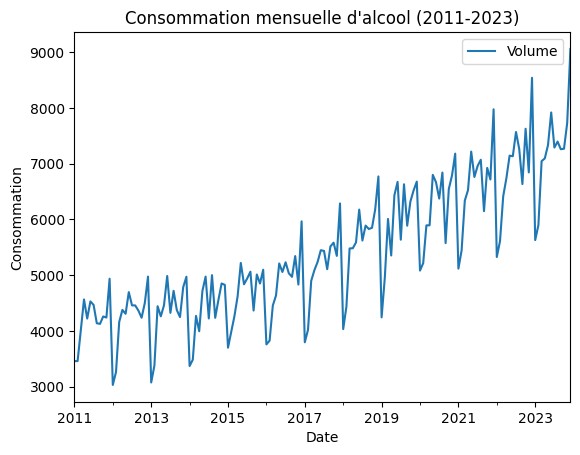

In [60]:
alcohol_data.plot(title="Consommation mensuelle d'alcool (2011-2023)")
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.show()

Analyse exploratoire
Nous analysons la série temporelle pour identifier les tendances, la saisonnalité et les éventuelles anomalies. Cela peut inclure :

La décomposition de la série temporelle en composantes (tendance, saisonnalité, résidus).
La visualisation des statistiques descriptives.

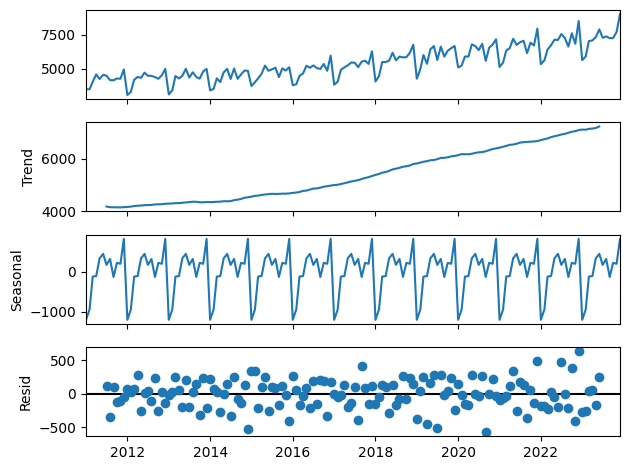

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(alcohol_data, model='additive', period=12)  # Try 'additive' as well
decomposition.plot()
plt.show()

# Inspect the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# La décomposition permet d'observer les éléments suivants :
# 1. Tendance : Si la composante de tendance présente un mouvement clair à la hausse ou à la baisse au fil du temps, cela indique la présence d'une tendance dans les données.
# 2. Composante saisonnière : Si l'amplitude de la composante saisonnière varie proportionnellement au niveau des données, cela suggère un modèle multiplicatif.
# Dans le cas contraire, si l'amplitude reste constante, cela suggère un modèle additif.



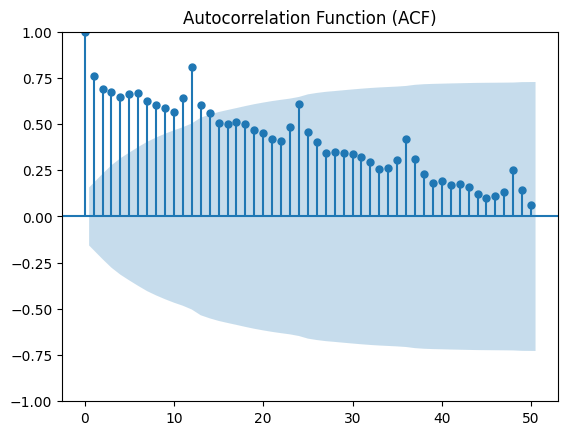

A trend component is present.
A seasonal component is present.


In [62]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot the autocorrelation function (ACF)
plot_acf(alcohol_data.dropna(), lags=50, title="Autocorrelation Function (ACF)")
plt.show()
# Based on the decomposition, we can conclude:
# - If the trend component shows a clear upward or downward movement over time, there is a trend in the data.
# - If the seasonal component exhibits repeating patterns at regular intervals, there is a seasonal component.

# Check for trend and seasonality
if trend.isnull().all():
    print("No clear trend detected.")
else:
    print("A trend component is present.")

if seasonal.abs().sum() > 0:
    print("A seasonal component is present.")
else:
    print("No clear seasonal component detected.")

Divisons cette série temporelle en un ensemble d'apprentissage et un ensemble de validation, de sorte qu'on ait 80% train / 20% test.

In [63]:
# Diviser la série temporelle en 80% train et 20% test
train_size = int(len(alcohol_data) * 0.8)
train_data = alcohol_data.iloc[:train_size]
test_data = alcohol_data.iloc[train_size:]

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'apprentissage : {len(train_data)}")
print(f"Taille de l'ensemble de validation : {len(test_data)}")

# Vérifier les ensembles
print("Ensemble d'apprentissage :")
print(train_data.head())
print("\nEnsemble de validation :")
print(test_data.head())

Taille de l'ensemble d'apprentissage : 124
Taille de l'ensemble de validation : 32
Ensemble d'apprentissage :
            Volume
Date              
2011-01-01    3459
2011-02-01    3458
2011-03-01    4002
2011-04-01    4564
2011-05-01    4221

Ensemble de validation :
            Volume
Date              
2021-05-01    7216
2021-06-01    6761
2021-07-01    6958
2021-08-01    7070
2021-09-01    6148


Tracons l'ensemble d'entraînement et de validation avec une couleur différente

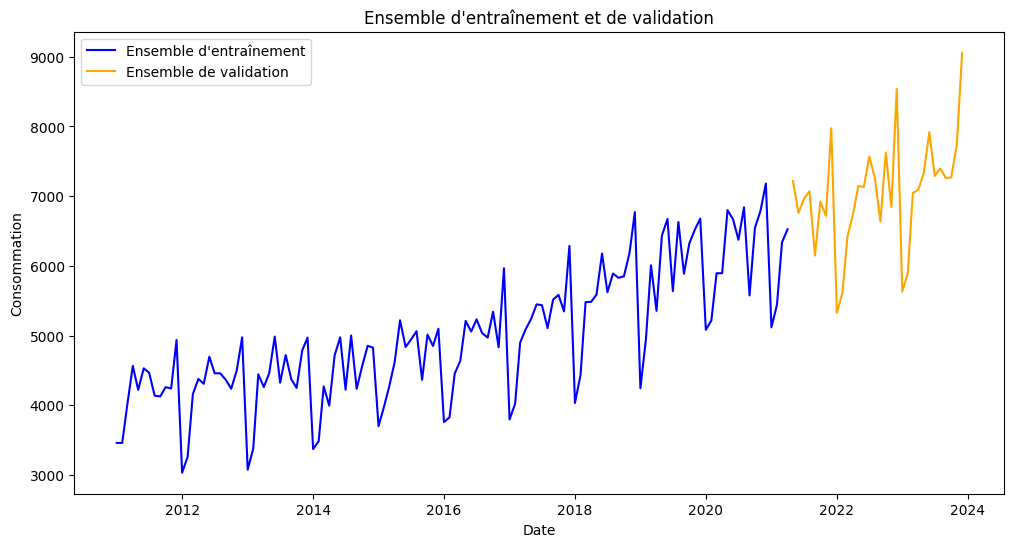

In [64]:
# Tracer l'ensemble d'entraînement et de validation
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Ensemble d'entraînement", color="blue")
plt.plot(test_data, label="Ensemble de validation", color="orange")
plt.title("Ensemble d'entraînement et de validation")
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.legend()
plt.show()

Nous allons maintenant appliquer l'algorithme de lissage exponentiel triple aux données d'entraînement (modèle additif en premier).

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Appliquer le modèle de lissage exponentiel triple (Holt-Winters) avec un modèle additif
model_additive = ExponentialSmoothing(train_data, seasonal='add', trend='add', seasonal_periods=12).fit()

model_additive.summary()

Dep. Variable:,Volume,No. Observations:,124
Model:,ExponentialSmoothing,SSE,6804069.489
Optimized:,True,AIC,1385.181
Trend:,Additive,BIC,1430.305
Seasonal:,Additive,AICC,1391.695
Seasonal Periods:,12,Date:,"Mon, 21 Apr 2025"
Box-Cox:,False,Time:,04:51:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1233147,alpha,True
smoothing_trend,0.1221164,beta,True


In [66]:
# Pour voir l'évolution du paramètre (a) tout au long de l'algorithme TES vous pouvez demander :
model_additive.level

Date
2011-01-01    4186.153172
2011-02-01    4191.970519
2011-03-01    4172.355947
2011-04-01    4220.061107
2011-05-01    4182.143379
                 ...     
2020-12-01    6404.035492
2021-01-01    6398.800992
2021-02-01    6403.263518
2021-03-01    6422.119194
2021-04-01    6458.812790
Freq: MS, Length: 124, dtype: float64

In [67]:
# Pour voir l'évolution du paramètre (b) tout au long de l'algorithme TES vous pouvez demander :
model_additive.trend

Date
2011-01-01   -10.362995
2011-02-01    -8.387110
2011-03-01    -9.758167
2011-04-01    -2.740952
2011-05-01    -7.036614
                ...    
2020-12-01    23.604352
2021-01-01    20.082655
2021-02-01    18.175181
2021-03-01    18.258280
2021-04-01    20.509535
Freq: MS, Length: 124, dtype: float64

In [68]:
# Pour voir l'évolution des coefficients saisonniers tout au long de l'algorithme TES, vous pouvez demander :
model_additive.season

Date
2011-01-01   -1069.156656
2011-02-01    -847.363306
2011-03-01     -91.673232
2011-04-01     -58.767475
2011-05-01     285.377532
                 ...     
2020-12-01     650.092164
2021-01-01   -1079.696625
2021-02-01    -851.796731
2021-03-01     -89.888148
2021-04-01     -63.008563
Freq: MS, Length: 124, dtype: float64

- Calculer les prédictions pour l'ensemble de validation.
- Représenter graphiquement les données d'apprentissage et de validation, ainsi que les prédictions de l'algorithme TES.
- Calculer l'erreur de prédiction au carré sur l'ensemble de validation.

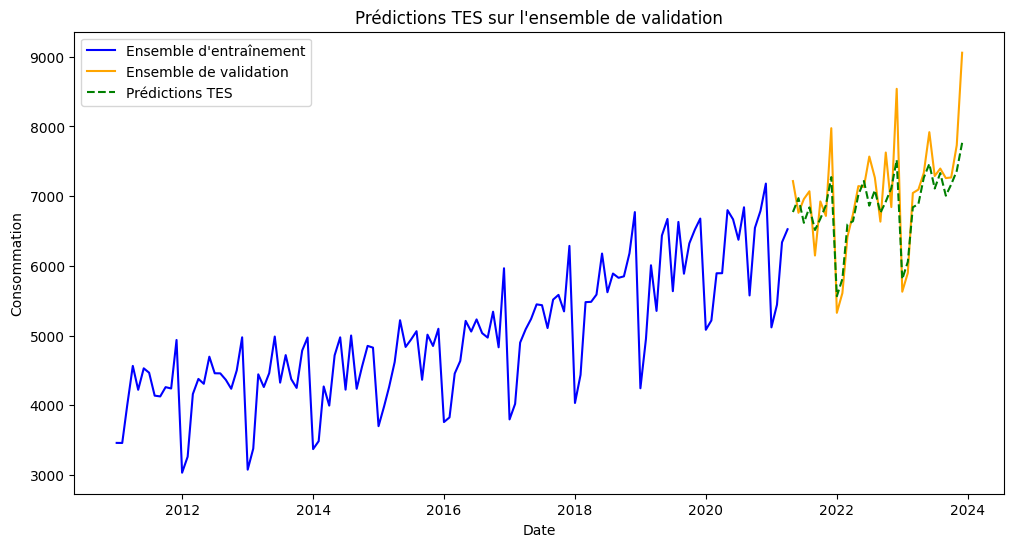

Erreur quadratique moyenne (MSE) sur l'ensemble de validation : 178649.8223


In [69]:
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Calculer les prédictions pour l'ensemble de validation
predictions_validation = model_additive.forecast(len(test_data))

# Représenter graphiquement les données d'apprentissage, de validation et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Ensemble d'entraînement", color="blue")
plt.plot(test_data, label="Ensemble de validation", color="orange")
plt.plot(test_data.index, predictions_validation, label="Prédictions TES", color="green", linestyle="--")
plt.title("Prédictions TES sur l'ensemble de validation")
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.legend()
plt.show()

# Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de validation
mse_validation_tes_additive = mean_squared_error(test_data, predictions_validation)
print(f"Erreur quadratique moyenne (MSE) sur l'ensemble de validation : {mse_validation_tes_additive:.4f}")

# Nous allons maintenant essayer un modèle avec une composante saisonnière multiplicative.

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Appliquer le modèle de lissage exponentiel triple (Holt-Winters) avec un modèle mutliplicatif
model_multiplicative = ExponentialSmoothing(train_data, seasonal='mul', trend='add', seasonal_periods=12).fit()

model_multiplicative.summary()

Dep. Variable:,Volume,No. Observations:,124
Model:,ExponentialSmoothing,SSE,6082805.885
Optimized:,True,AIC,1371.286
Trend:,Additive,BIC,1416.411
Seasonal:,Multiplicative,AICC,1377.800
Seasonal Periods:,12,Date:,"Mon, 21 Apr 2025"
Box-Cox:,False,Time:,04:51:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1110714,alpha,True
smoothing_trend,0.0863889,beta,True



- Calculer les prédictions pour l'ensemble de validation.
- Représenter graphiquement les données d'apprentissage et de validation, ainsi que les prédictions de l'algorithme TES.
- Calculer l'erreur de prédiction au carré sur l'ensemble de validation.

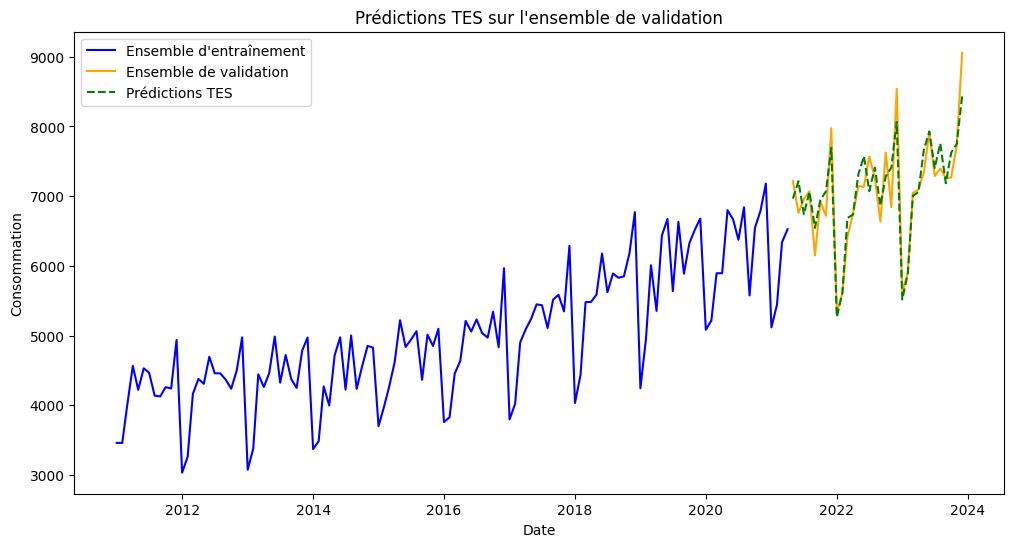

Erreur quadratique moyenne (MSE) sur l'ensemble de validation : 85551.2035


In [71]:
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Calculer les prédictions pour l'ensemble de validation
predictions_validation = model_multiplicative.forecast(len(test_data))

# Représenter graphiquement les données d'apprentissage, de validation et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Ensemble d'entraînement", color="blue")
plt.plot(test_data, label="Ensemble de validation", color="orange")
plt.plot(test_data.index, predictions_validation, label="Prédictions TES", color="green", linestyle="--")
plt.title("Prédictions TES sur l'ensemble de validation")
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.legend()
plt.show()

# Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de validation
mse_validation_tes_multiplicative = mean_squared_error(test_data, predictions_validation)
print(f"Erreur quadratique moyenne (MSE) sur l'ensemble de validation : {mse_validation_tes_multiplicative:.4f}")

# Classical AutoRegressive models (no trend no season)

 Classical AutoRegressive models (no trend no season)
Essayez différents modèles AR classiques et sélectionnez le meilleur ordre pour cette série chronologique

Ordre AR(p): 1, BIC: 1963.3892
Ordre AR(p): 2, BIC: 1946.8005
Ordre AR(p): 3, BIC: 1927.1384
Ordre AR(p): 4, BIC: 1915.3767
Ordre AR(p): 5, BIC: 1898.7586
Ordre AR(p): 6, BIC: 1881.6351
Ordre AR(p): 7, BIC: 1871.5016
Ordre AR(p): 8, BIC: 1860.3783
Ordre AR(p): 9, BIC: 1849.1347
Ordre AR(p): 10, BIC: 1838.7213
Ordre AR(p): 11, BIC: 1808.0568
Ordre AR(p): 12, BIC: 1605.1162
Ordre AR(p): 13, BIC: 1591.4507
Ordre AR(p): 14, BIC: 1579.6402
Ordre AR(p): 15, BIC: 1541.2309
Ordre AR(p): 16, BIC: 1532.5204
Ordre AR(p): 17, BIC: 1523.6081
Ordre AR(p): 18, BIC: 1515.1542
Ordre AR(p): 19, BIC: 1507.0793
Ordre AR(p): 20, BIC: 1494.1531
Ordre AR(p): 21, BIC: 1484.2635
Ordre AR(p): 22, BIC: 1469.4761
Ordre AR(p): 23, BIC: 1454.3775
 Meilleur ordre AR(p) selon BIC: 23, BIC: 1454.38


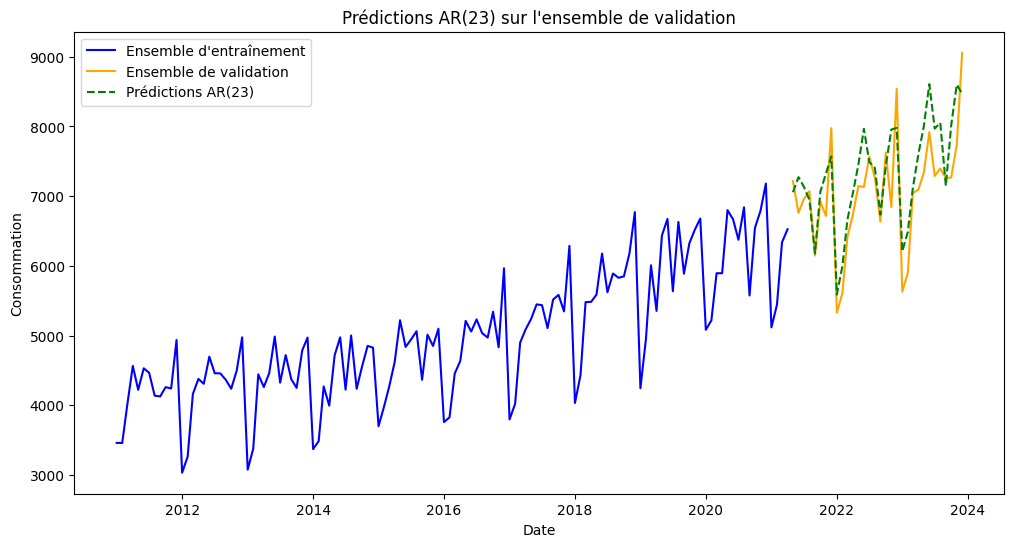

Erreur quadratique moyenne (MSE) pour le modèle final AR(23): 253445.3790


In [72]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Tester différents ordres pour le modèle AR
max_lag = 23  # Nombre maximum de retards (p) à tester
mse_results = []
bic_results = []

for lag in range(1, max_lag + 1):
    # Ajuster le modèle AR
    model_ar = AutoReg(train_data, lags=lag).fit()
    
    # Prédire sur l'ensemble de validation
    predictions = model_ar.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    
    # # Calculer l'erreur quadratique moyenne (MSE)
    # mse = mean_squared_error(test_data, predictions)
    # mse_results.append((lag, mse))

    # BIC
    bic = model_ar.bic
    bic_results.append((lag, bic))

   
    
    print(f"Ordre AR(p): {lag}, BIC: {bic:.4f}")

# # Trouver le meilleur ordre AR
# best_lag, best_mse = min(mse_results, key=lambda x: x[1])
# print(f"\nMeilleur ordre AR(p): {best_lag}, avec MSE: {best_mse:.4f}")

 # Trouver le meilleur ordre AR selon le BIC
best_lag_bic, best_bic = min(bic_results, key=lambda x: x[1])
print(f" Meilleur ordre AR(p) selon BIC: {best_lag_bic}, BIC: {best_bic:.2f}")


# Ajuster le modèle final avec le meilleur ordre
model_final = AutoReg(train_data, lags=best_lag_bic).fit()

# Prédire sur l'ensemble de validation
predictions_final = model_final.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Représenter graphiquement les résultats
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Ensemble d'entraînement", color="blue")
plt.plot(test_data, label="Ensemble de validation", color="orange")
plt.plot(test_data.index, predictions_final, label=f"Prédictions AR({best_lag_bic})", color="green", linestyle="--")
plt.title(f"Prédictions AR({best_lag_bic}) sur l'ensemble de validation")
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.legend()
plt.show()


# Calculer l'erreur quadratique moyenne (MSE) pour le modèle final
final_mse_no_trend_no_saison = mean_squared_error(test_data, predictions_final)
print(f"Erreur quadratique moyenne (MSE) pour le modèle final AR({best_lag_bic}): {final_mse_no_trend_no_saison:.4f}")

# AutoRegressive models with trend
Questions : Same questions with AR with trend avec AutoReg

Ordre AR(p): 1, BIC: 1980.4276
Ordre AR(p): 2, BIC: 1957.2677
Ordre AR(p): 3, BIC: 1932.8138
Ordre AR(p): 4, BIC: 1919.1421
Ordre AR(p): 5, BIC: 1900.9782
Ordre AR(p): 6, BIC: 1882.4392
Ordre AR(p): 7, BIC: 1871.9721
Ordre AR(p): 8, BIC: 1860.6799
Ordre AR(p): 9, BIC: 1849.2770
Ordre AR(p): 10, BIC: 1838.6765
Ordre AR(p): 11, BIC: 1807.2493
Ordre AR(p): 12, BIC: 1598.6115
Ordre AR(p): 13, BIC: 1585.3347
Ordre AR(p): 14, BIC: 1574.4451
Ordre AR(p): 15, BIC: 1539.3438


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extend

Ordre AR(p): 16, BIC: 1530.9079
Ordre AR(p): 17, BIC: 1522.2337
Ordre AR(p): 18, BIC: 1513.4808
Ordre AR(p): 19, BIC: 1505.2255
Ordre AR(p): 20, BIC: 1490.7887
Ordre AR(p): 21, BIC: 1481.3541
Ordre AR(p): 22, BIC: 1464.5011
Ordre AR(p): 23, BIC: 1451.5298
 Meilleur ordre AR(p) selon BIC: 23, BIC: 1451.53


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\

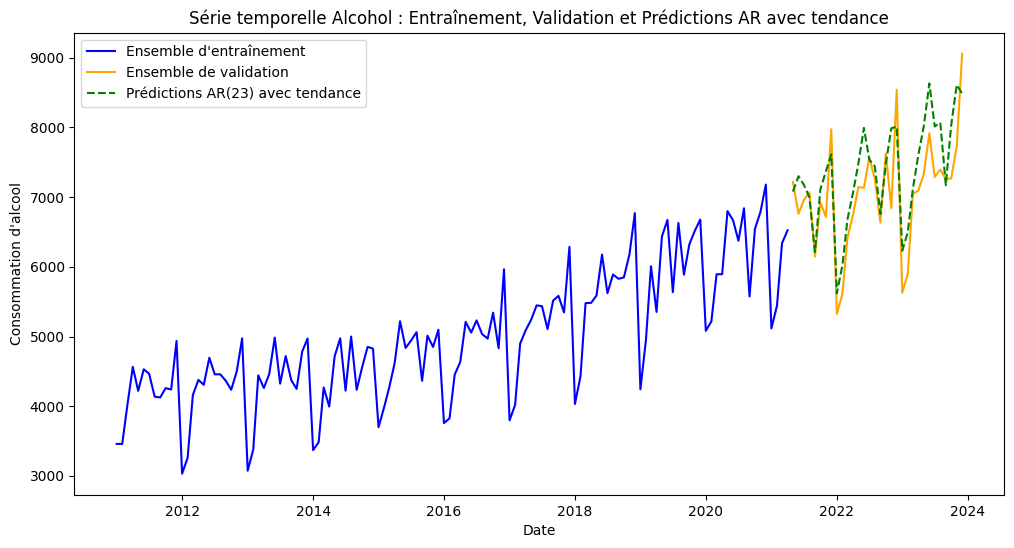

Erreur quadratique moyenne (MSE) pour le modèle final AR(23) avec tendance : 267020.3918


In [73]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Charger les données Alcohol.csv
alcohol_data = pd.read_csv('Alcohol.csv', sep=';', parse_dates=['Date'], dayfirst=True)
alcohol_data.set_index('Date', inplace=True)

# Diviser les données en ensembles d'entraînement (80%) et de validation (20%)
train_size = int(len(alcohol_data) * 0.8)
train_data = alcohol_data.iloc[:train_size]
validation_data = alcohol_data.iloc[train_size:]

# Tester différents ordres pour le modèle AR avec tendance
max_lag = 23  # Nombre maximum de retards (p) à tester
mse_results = []

for lag in range(1, max_lag + 1):
    # Ajuster le modèle AR avec tendance
    ar_trend_model = AutoReg(train_data['Volume'], lags=lag, trend='t').fit()
    
    # Prédire sur l'ensemble de validation
    ar_trend_predictions = ar_trend_model.predict(start=validation_data.index[0], end=validation_data.index[-1])
    
    # Calculer l'erreur quadratique moyenne (MSE)
    # mse = mean_squared_error(validation_data['Volume'], ar_trend_predictions)
    # mse_results.append((lag, mse))
    # print(f"Ordre AR(p): {lag}, MSE: {mse:.4f}")

    bic = ar_trend_model.bic
    bic_results.append((lag, bic))
    print(f"Ordre AR(p): {lag}, BIC: {bic:.4f}")

# # Trouver le meilleur ordre AR
# best_order, best_mse = min(mse_results, key=lambda x: x[1])
# print(f"\nMeilleur ordre AR(p): {best_order}, avec MSE: {best_mse:.4f}")

# Trouver le meilleur ordre AR selon le BIC
best_order, best_bic = min(bic_results, key=lambda x: x[1])
print(f" Meilleur ordre AR(p) selon BIC: {best_order}, BIC: {best_bic:.2f}")

# Ajuster le modèle final avec le meilleur ordre
ar_trend_model_final = AutoReg(train_data['Volume'], lags=best_order, trend='t').fit()

# Prédire sur l'ensemble de validation
ar_trend_predictions_final = ar_trend_model_final.predict(start=validation_data.index[0], end=validation_data.index[-1])

# Tracer les ensembles d'entraînement, de validation et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Volume'], label='Ensemble d\'entraînement', color='blue')
plt.plot(validation_data.index, validation_data['Volume'], label='Ensemble de validation', color='orange')
plt.plot(validation_data.index, ar_trend_predictions_final, label=f'Prédictions AR({best_order}) avec tendance', color='green', linestyle='--')
plt.title('Série temporelle Alcohol : Entraînement, Validation et Prédictions AR avec tendance')
plt.xlabel('Date')
plt.ylabel('Consommation d\'alcool')
plt.legend()
plt.show()

# Calculer l'erreur quadratique moyenne (MSE) pour le modèle final
final_mse_with_trend = mean_squared_error(validation_data['Volume'], ar_trend_predictions_final)
print(f"Erreur quadratique moyenne (MSE) pour le modèle final AR({best_order}) avec tendance : {final_mse_with_trend:.4f}")

# AutoRegressive models with seasonal component

In [74]:
# Nous allons maintenant appliquer un modèle AR saisonnier d'ordre 1 sans tendance (pour commencer) :
# Pour cela, vous devez spécifier seasonal = True et indiquer la période de la composante saisonnière (12 ici)
ARS = AutoReg(train_data, lags = 1, trend = 'c',seasonal=True, period = 12).fit()
ARS.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  124
Model:               Seas. AutoReg(1)   Log Likelihood                -893.356
Method:               Conditional MLE   S.D. of innovations            345.197
Date:                Mon, 21 Apr 2025   AIC                           1814.712
Time:                        04:51:54   BIC                           1854.082
Sample:                    02-01-2011   HQIC                          1830.704
                         - 04-01-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1333.0596    259.286     -5.141      0.000   -1841.252    -824.868
s(2,12)     1932.9816    169.373     11.413      0.000    1601.016    2264.947
s(3,12)     2497.7188    164.925     15.145      0.000    2174.471    2820.967
s(4,12)     1826.6756    154.673     11.810      0.000    1523.522    2129.830
s(5,12)     2156.0457    159.077     13.553      0.000    1844.261    2467.831
s(6,12)     1984.0460    155.994     12.719      0.000    1678.304    2289.788
s(7,12)     1482.4640    155.090      9.559      0.000    1178.493    1786.435
s(8,12)     2002.4226    156.975     12.756      0.000    1694.758    2310.087
s(9,12)     1441.5621    155.617      9.264      0.000    1136.558    1746.566
s(10,12)    2043.7975    158.170     12.922      0.000    1733.790    2353.805
s(11,12)    1891.0031    156.137     12.111      0.000    1584.980    2197.026
s(12,12)    2284.6050    155.609     14.682      0.000    1979.617    2589.593
Volume.L1      0.9107      0.041     22.337      0.000       0.831       0.991
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0980           +0.0000j            1.0980            0.0000
-----------------------------------------------------------------------------
"""

Question : Essayez maintenant différents modèles ARS avec des commandes différentes et sélectionnez le meilleur.

Best ARS order: 23 with BIC: 1452.837500249814


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

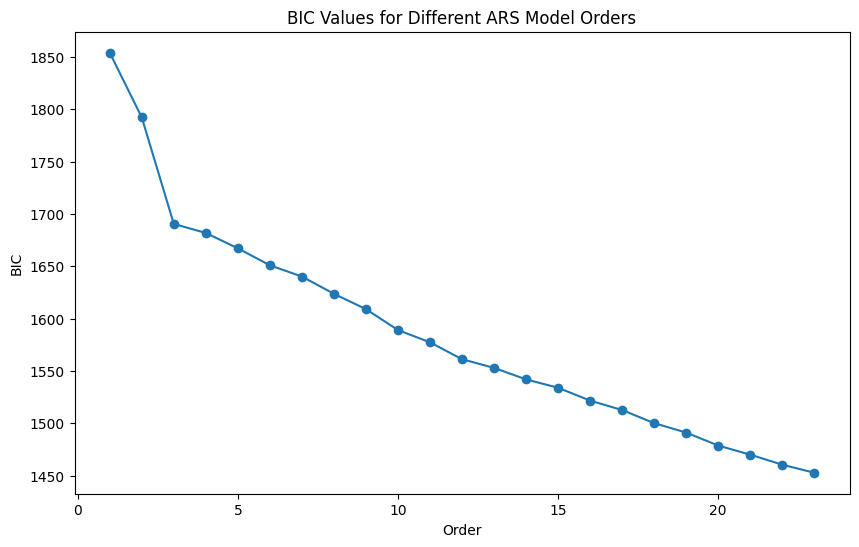

In [75]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Initialize a list to store AIC values for different orders
#ars_aic_values = []
ars_bic_results = []
orders = range(1, 24)  # Test ARS models with orders from 1 to 24

# bic = model_ar.bic
# bic_results.append((lag, bic))
# print(f"Ordre AR(p): {lag}, BIC: {bic:.4f}")
# Loop through different orders and fit the ARS model
# for order in orders:
#     ars_model = AutoReg(train_data['Volume'], lags=order, seasonal=True, period=12).fit()
#     ars_aic_values.append((order, ars_model.aic))


for order in orders:
    ars_model = AutoReg(train_data['Volume'], lags=order, seasonal=True, period=12).fit()
    ars_bic_results.append((order, ars_model.bic))

# Find the order with the lowest BIC
best_ars_order = min(ars_bic_results, key=lambda x: x[1])
print(f"Best ARS order: {best_ars_order[0]} with BIC: {best_ars_order[1]}")

# Plot AIC values for different orders
ars_orders, ars_aic_scores = zip(*ars_bic_results)
plt.figure(figsize=(10, 6))
plt.plot(ars_orders, ars_aic_scores, marker='o')
plt.title('BIC Values for Different ARS Model Orders')
plt.xlabel('Order')
plt.ylabel('BIC')
plt.show()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


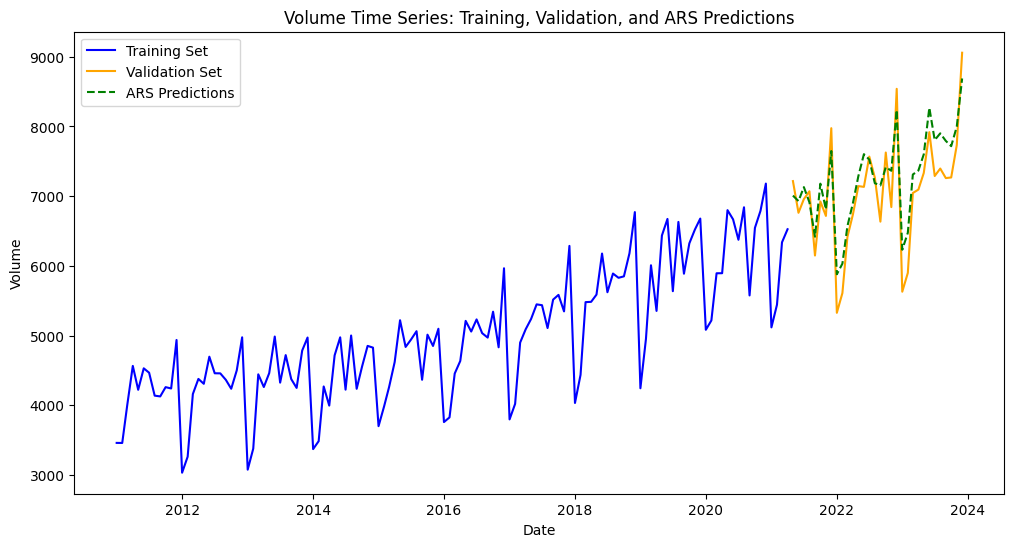

Squared Prediction Error on Validation Set (ARS): 127727.1274


In [76]:
# Apply the selected ARS model to predict the whole validation data
ars_model = AutoReg(train_data['Volume'], lags=best_ars_order[0], seasonal=True, period=12).fit()
ars_predictions = ars_model.predict(start=validation_data.index[0], end=validation_data.index[-1])

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Volume'], label='Training Set', color='blue')
plt.plot(validation_data.index, validation_data['Volume'], label='Validation Set', color='orange')
plt.plot(validation_data.index, ars_predictions, label='ARS Predictions', color='green', linestyle='--')
plt.title('Volume Time Series: Training, Validation, and ARS Predictions')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ars_squared_error = mean_squared_error(validation_data['Volume'], ars_predictions) 
print(f"Squared Prediction Error on Validation Set (ARS): {ars_squared_error:.4f}")

Question : Mêmes questions pour un modèle autorégressif saisonnier avec une tendance  (ARS avec tendance)

Ordre AR(p): 1, BIC: 1799.5352
Ordre AR(p): 2, BIC: 1771.3946
Ordre AR(p): 3, BIC: 1685.1798
Ordre AR(p): 4, BIC: 1674.8604
Ordre AR(p): 5, BIC: 1662.9397
Ordre AR(p): 6, BIC: 1648.0144
Ordre AR(p): 7, BIC: 1637.7052
Ordre AR(p): 8, BIC: 1624.1790
Ordre AR(p): 9, BIC: 1608.6764
Ordre AR(p): 10, BIC: 1590.9796
Ordre AR(p): 11, BIC: 1578.7277
Ordre AR(p): 12, BIC: 1560.7434
Ordre AR(p): 13, BIC: 1553.1723
Ordre AR(p): 14, BIC: 1539.7211
Ordre AR(p): 15, BIC: 1532.3392
Ordre AR(p): 16, BIC: 1520.4181
Ordre AR(p): 17, BIC: 1511.8793


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\

Ordre AR(p): 18, BIC: 1499.5254


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deter

Ordre AR(p): 19, BIC: 1490.8727
Ordre AR(p): 20, BIC: 1476.3113
Ordre AR(p): 21, BIC: 1468.2127
Ordre AR(p): 22, BIC: 1460.0458
Ordre AR(p): 23, BIC: 1451.6660

Best ARS order with trend: 23, with BIC: 1451.6660


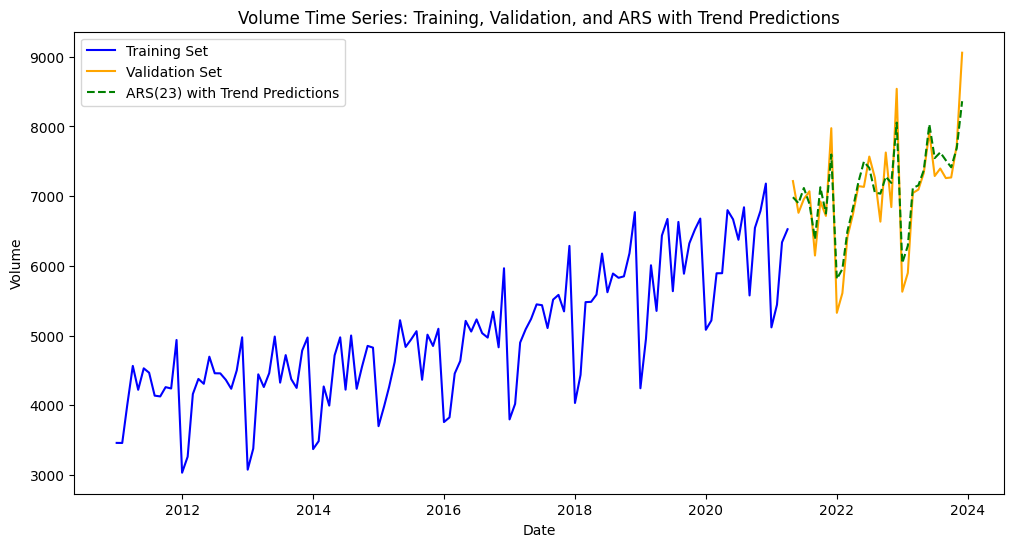

Squared Prediction Error on Validation Set (ARS with Trend): 81832.5422


In [77]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Initialize a list to store MSE values for different orders
ars_trend_mse_values = []
ars_trend_bic_values = []
orders = range(1, 24)  # Test ARS models with orders from 1 to 23

# Loop through different orders and fit the ARS model with trend
for order in orders:
    ars_trend_model = AutoReg(train_data['Volume'], lags=order, trend='t', seasonal=True, period=12).fit()
    ars_trend_predictions = ars_trend_model.predict(start=validation_data.index[0], end=validation_data.index[-1])

    
    # mse = mean_squared_error(validation_data['Volume'], ars_trend_predictions)
    # ars_trend_mse_values.append((order, mse))
    # print(f"Order ARS(p): {order}, MSE: {mse:.4f}")

    bic_ars_t = ars_trend_model.bic
    ars_trend_bic_values.append((order, bic_ars_t))
    print(f"Ordre AR(p): {order}, BIC: {bic_ars_t:.4f}")

# Find the order with the lowest MSE
best_ars_trend_order, best_ars_trend_bic = min(ars_trend_bic_values, key=lambda x: x[1])
print(f"\nBest ARS order with trend: {best_ars_trend_order}, with BIC: {best_ars_trend_bic:.4f}")



# Fit the final ARS model with trend using the best order
ars_trend_model_final = AutoReg(train_data['Volume'], lags=best_ars_trend_order, trend='t', seasonal=True, period=12).fit()
ars_trend_predictions_final = ars_trend_model_final.predict(start=validation_data.index[0], end=validation_data.index[-1])

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Volume'], label='Training Set', color='blue')
plt.plot(validation_data.index, validation_data['Volume'], label='Validation Set', color='orange')
plt.plot(validation_data.index, ars_trend_predictions_final, label=f'ARS({best_ars_trend_order}) with Trend Predictions', color='green', linestyle='--')
plt.title('Volume Time Series: Training, Validation, and ARS with Trend Predictions')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ars_trend_squared_error = mean_squared_error(validation_data['Volume'], ars_trend_predictions_final)
print(f"Squared Prediction Error on Validation Set (ARS with Trend): {ars_trend_squared_error:.4f}")

# Comparaison  des MSE pour la Time series prediction et le choix de meilleur

In [78]:
# Résultats des erreurs quadratiques moyennes (MSE) pour chaque modèle
mse_results = {
    "TES Additive": mse_validation_tes_additive,  # MSE pour le modèle TES Additif
    "TES Multiplicative": mse_validation_tes_multiplicative,  # MSE pour le modèle TES Multiplicatif
    "AR Model no trend no saison": final_mse_no_trend_no_saison,  # MSE pour le modèle AR classique
    "AR with Trend": final_mse_with_trend,  # MSE pour le modèle AR avec tendance
    "ARS Model": ars_squared_error,  # MSE pour le modèle AR saisonnier
    "ARS with Trend": ars_trend_squared_error,  # MSE pour le modèle AR saisonnier avec tendance
}

# Trier les résultats par MSE croissant
sorted_mse_results = sorted(mse_results.items(), key=lambda x: x[1])

# Afficher les résultats triés
print("Comparaison des erreurs quadratiques moyennes (MSE) :")
for model, mse in sorted_mse_results:
    print(f"{model}: {mse:.4f}")

# Identifier le meilleur modèle
best_model, best_mse = sorted_mse_results[0]
print(f"\nLe meilleur modèle est '{best_model}' avec une erreur quadratique moyenne (MSE) de {best_mse:.4f}.")

Comparaison des erreurs quadratiques moyennes (MSE) :
ARS with Trend: 81832.5422
TES Multiplicative: 85551.2035
ARS Model: 127727.1274
TES Additive: 178649.8223
AR Model no trend no saison: 253445.3790
AR with Trend: 267020.3918

Le meilleur modèle est 'ARS with Trend' avec une erreur quadratique moyenne (MSE) de 81832.5422.


Appliquons le meilleur modèle parmi ceux que nous avons essayés dans ce TP pour la Time series prediction à l'ensemble de la série Alcohol pour prédire les 24 valeurs suivantes de cette série chronologique (c'est-à-dire les valeurs de 
janvier 2024 à décembre 2025)

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\PC\AppData\Local\Temp\ipykernel_40528\2306917577.py:15: Futu

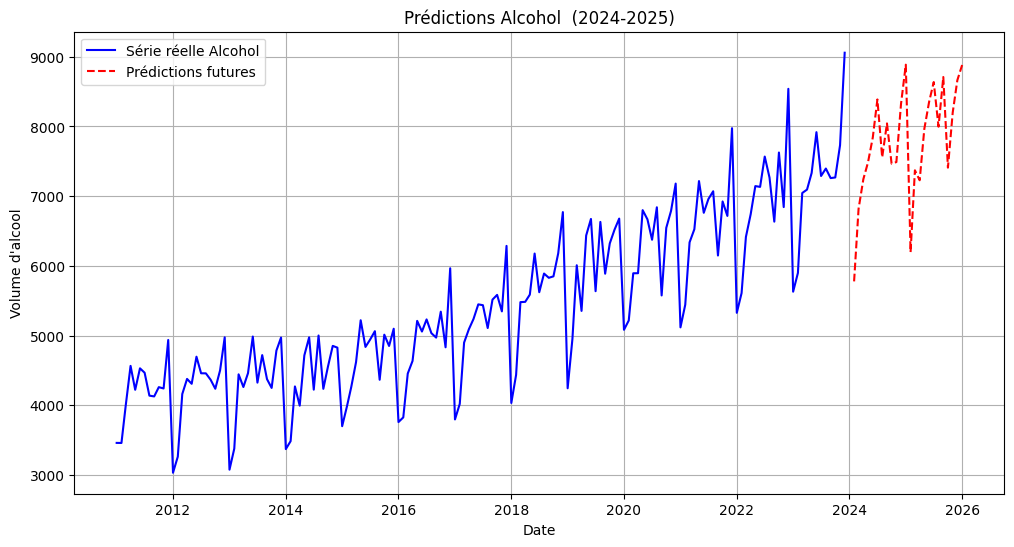

Prédictions pour Janvier 2024 à Décembre 2025 :
2024-01-01    5776.668470
2024-02-01    6818.138499
2024-03-01    7243.800694
2024-04-01    7483.530655
2024-05-01    7839.832601
2024-06-01    8387.301044
2024-07-01    7556.358005
2024-08-01    8043.542696
2024-09-01    7465.498739
2024-10-01    7488.958458
2024-11-01    8323.922008
2024-12-01    8886.319402
2025-01-01    6196.087669
2025-02-01    7370.985608
2025-03-01    7227.594798
2025-04-01    7964.669061
2025-05-01    8352.257218
2025-06-01    8636.971683
2025-07-01    7996.499735
2025-08-01    8709.384484
2025-09-01    7408.787302
2025-10-01    8199.960403
2025-11-01    8663.587267
2025-12-01    8881.525562
Freq: MS, dtype: float64
 Les prédictions ont été enregistrées dans : Predictions_2024_2025_Loic_&_Cyril.txt


In [79]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import pandas as pd

# On suppose que ta série s'appelle 'alcohol' (Series pandas avec un index temporel mensuel)
# Et que best_ars_trend_order est défini d'après ton code précédent

# Étape 1 : Ajuster le modèle ARS avec tendance sur toute la série
final_ars_trend_model = AutoReg(alcohol_data, lags=best_ars_trend_order, trend='t', seasonal=True, period=12).fit()

# Étape 2 : Prédire les 24 prochains mois
future_predictions = final_ars_trend_model.predict(start=len(alcohol_data), end=len(alcohol_data) + 23)

# Étape 3 : Générer les dates futures
future_index = pd.date_range(start=alcohol_data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')

# Étape 4 : Tracer la série complète + les prédictions
plt.figure(figsize=(12, 6))
plt.plot(alcohol_data.index, alcohol_data, label='Série réelle Alcohol', color='blue')
plt.plot(future_index, future_predictions, label='Prédictions futures ', color='red', linestyle='--')
plt.title('Prédictions Alcohol  (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Volume d\'alcool')
plt.legend()
plt.grid(True)
plt.show()

# Étape 5 : Afficher les prédictions
print("Prédictions pour Janvier 2024 à Décembre 2025 :")
print(future_predictions)

# Étape 5 : Sauvegarde dans un fichier texte
output_file = 'Predictions_2024_2025_Loic_&_Cyril.txt'

# Ouvrir le fichier et écrire les résultats
with open(output_file, 'w') as f:
    f.write("Date\tVolume\n")  # En-têtes
    for date, value in zip(future_index, future_predictions):
        f.write(f"{date.strftime('%Y-%m')}\t{value:.2f}\n")  # Date + valeur prédite avec 2 décimales

print(f" Les prédictions ont été enregistrées dans : {output_file}")
